In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image 
import PIL 

References used: 
https://stackoverflow.com/questions/59979760/how-to-detect-all-rectangular-boxes-python-opencv-without-missing-anything
https://stackoverflow.com/questions/60894593/how-to-sharpen-the-edges-in-opencv-python

In [6]:
def getBoxed(pth):
    img_path = pth
    src = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.imread(img_path)

    # convert to binary by thresholding
    ret, binary_map = cv2.threshold(src,127,255,0)

    # do connected components processing
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_map, None, None, None, 8, cv2.CV_32S)

    #get CC_STAT_AREA component as stats[label, COLUMN] 
    areas = stats[1:,cv2.CC_STAT_AREA]

    result = np.zeros((labels.shape), np.uint8)

    for i in range(0, nlabels - 1):
        if areas[i] >= 30:   #keep
            result[labels == i + 1] = 255
    img = result

    thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)[1]

    # Fill rectangular contours
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(thresh, [c], -1, (255,255,255), -1)

    # Morph open
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=4)

    # Draw rectangles
    cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 3)
    return image, opening

def getRack(pth):
    
    img_path = pth
    src = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.imread(img_path).copy()
    # convert to binary by thresholding
    ret, binary_map = cv2.threshold(src, 100, 255, cv2.THRESH_BINARY)

    # do connected components processing
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_map, None, None, None, 8, cv2.CV_32S)

    #get CC_STAT_AREA component as stats[label, COLUMN] 
    areas = stats[1:,cv2.CC_STAT_AREA]

    result = np.zeros((labels.shape), np.uint8)

    for i in range(0, nlabels - 1):
        if areas[i] >= 50:   #keep
            result[labels == i + 1] = 255

    img = result
    thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)[1]

    # Fill rectangular contours
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(thresh, [c], -1, (255,255,255), -1)

    # Morph open
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11,11))
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=4)

    # Draw rectangles
    cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 3)
    return image, opening 

def processedLayout(layout_dir, results_dir):
    filepaths = [x for x in os.listdir(layout_dir) if x.endswith(".png")]
    filepaths.sort()
    i=0
    for path in filepaths:
        print(i)
        i+=1
        imgplot = plt.imshow(cv2.imread(layout_dir + path), cmap='gray')
        plt.show()
        rackann, rack = getRack(layout_dir + path)
        boxann, box = getBoxed(layout_dir + path)

        res = np.zeros(rack.shape)
        ind_rack = np.where(rack == 255)
        res[ind_rack] = 115
        ind_box = np.where(box == 255)
        res[ind_box] = 255
        plt.imshow(res)
        plt.show()
        
        im = Image.fromarray(res)
        if im.mode != 'RGB':
            im = im.convert('RGB')
        im.save(results_dir + path)

0


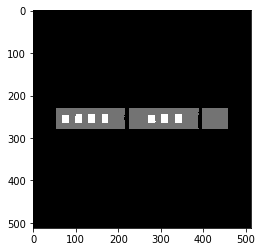

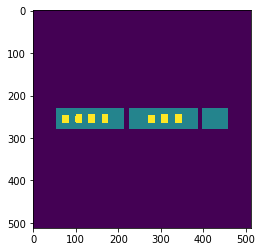

1


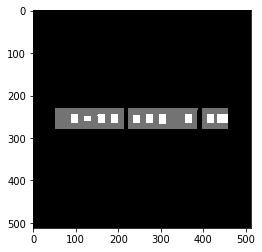

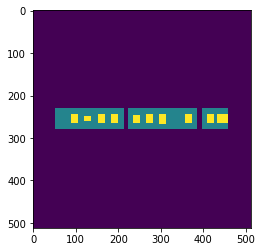

2


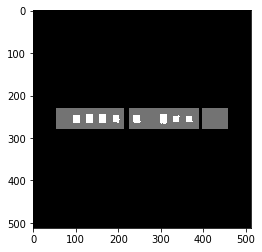

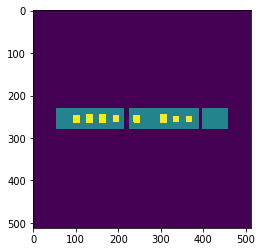

3


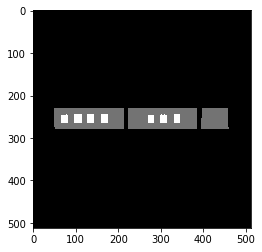

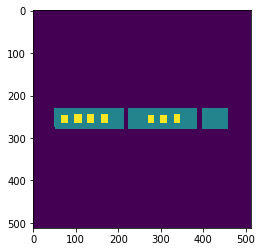

4


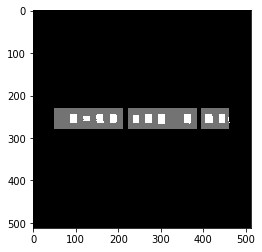

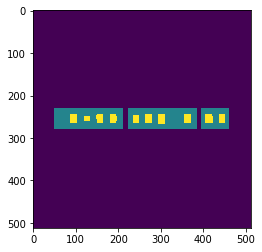

5


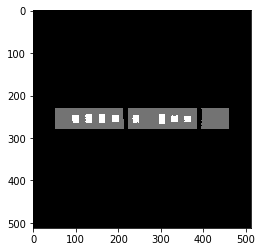

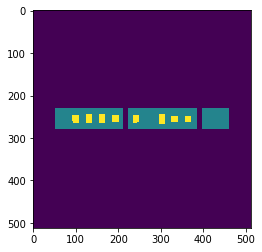

6


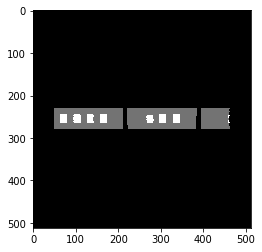

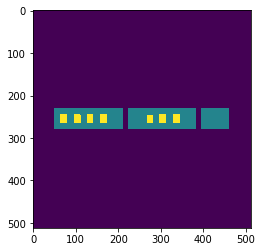

7


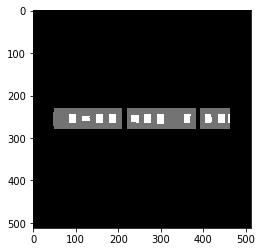

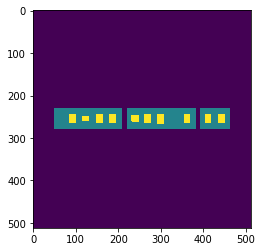

8


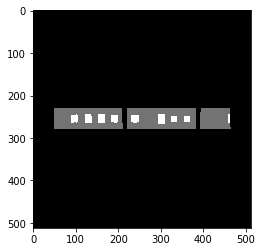

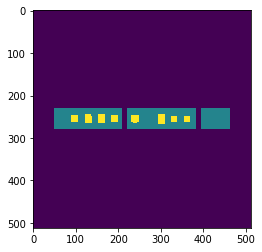

9


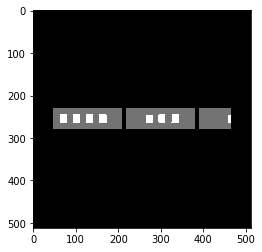

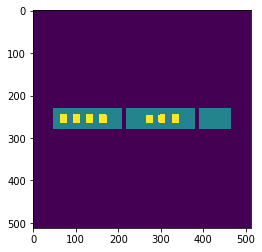

10


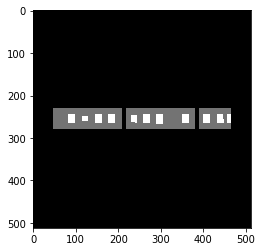

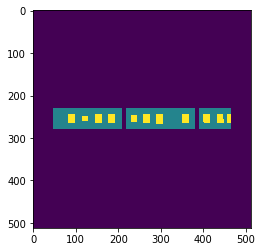

11


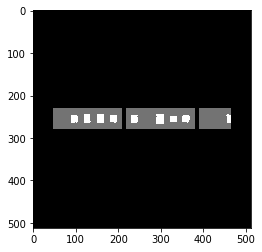

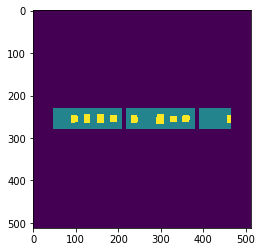

12


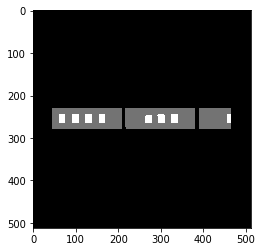

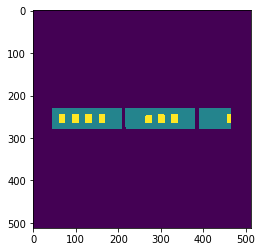

13


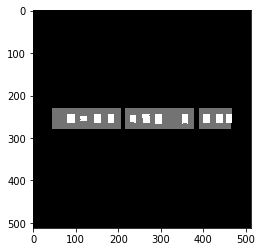

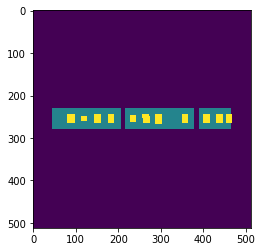

14


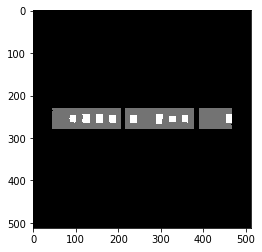

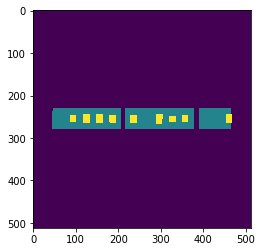

15


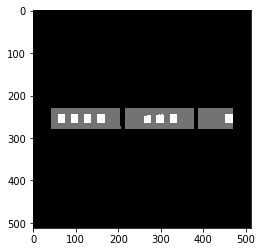

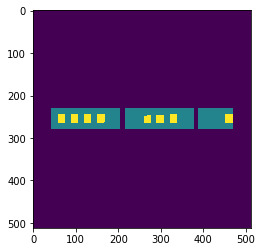

16


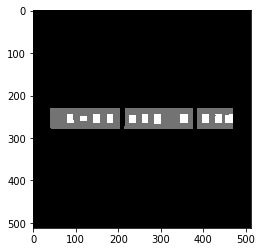

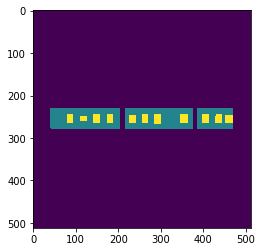

17


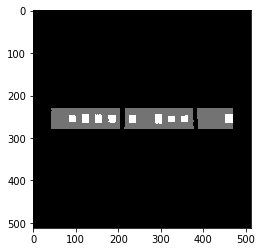

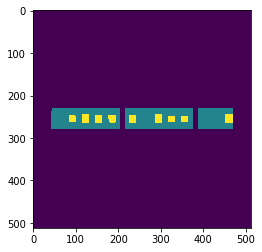

18


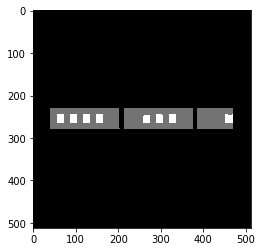

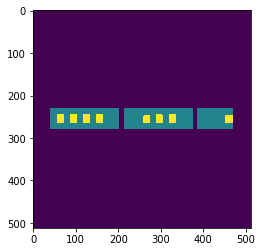

19


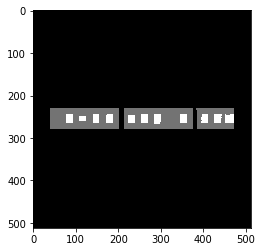

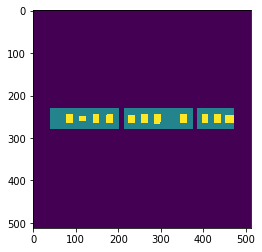

20


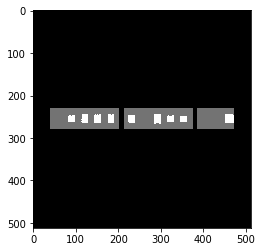

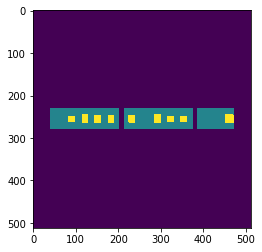

21


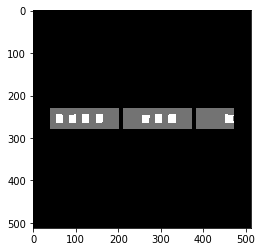

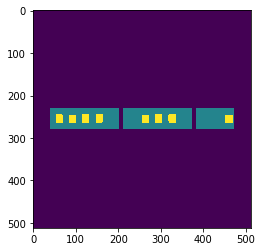

22


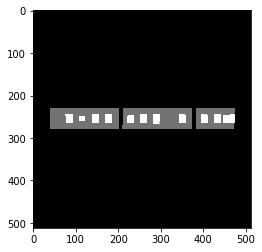

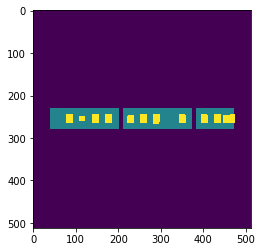

23


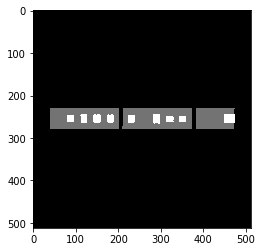

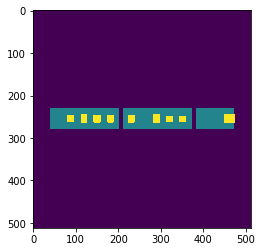

24


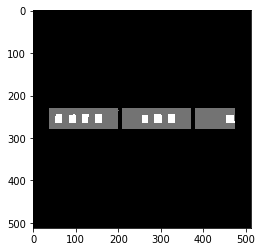

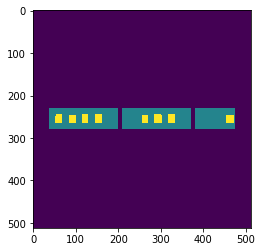

25


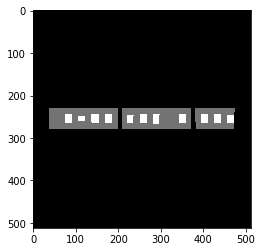

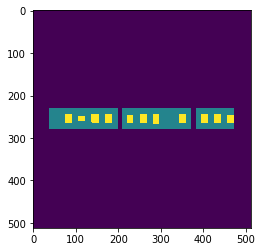

26


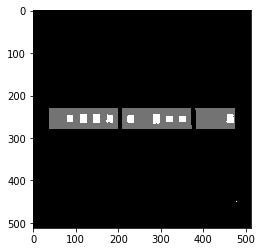

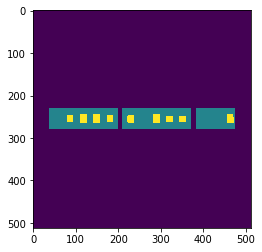

27


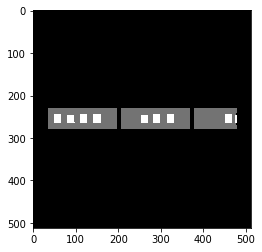

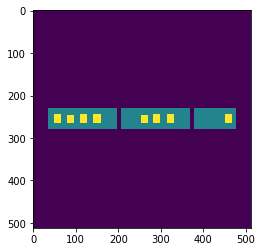

28


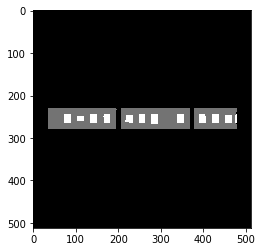

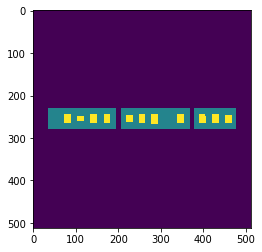

29


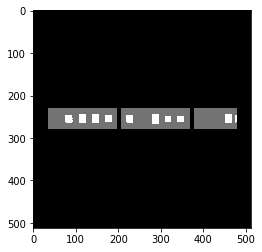

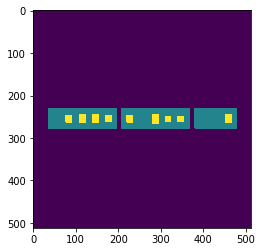

30


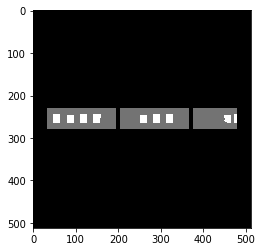

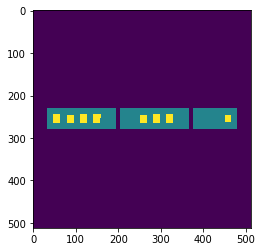

31


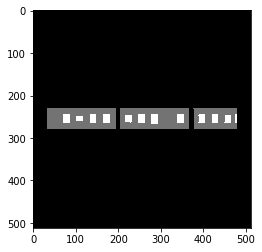

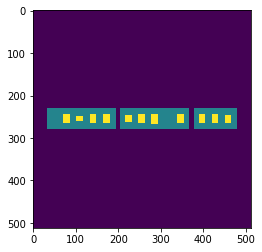

32


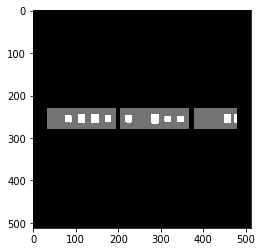

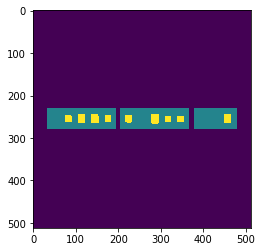

33


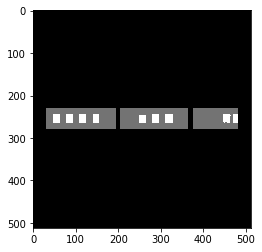

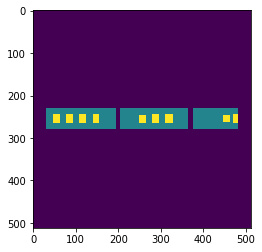

34


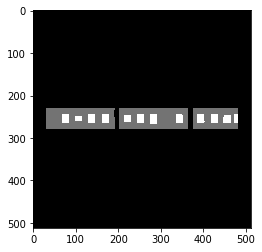

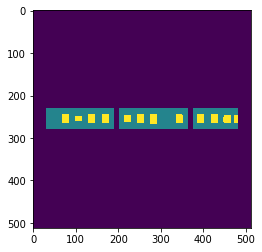

35


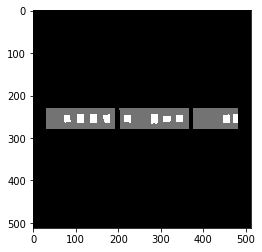

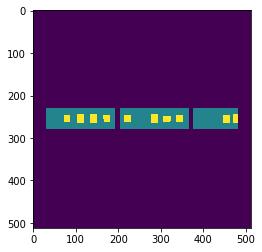

36


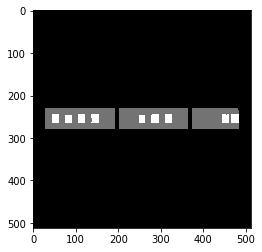

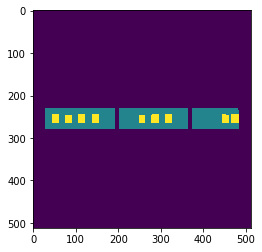

37


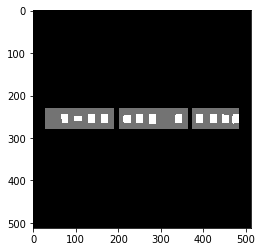

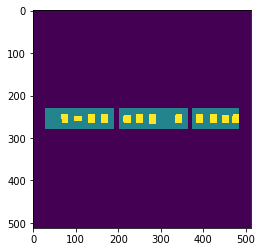

38


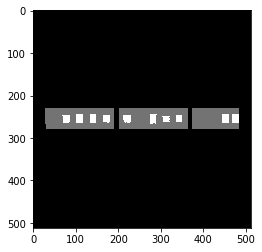

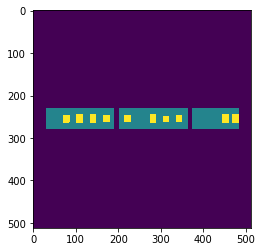

39


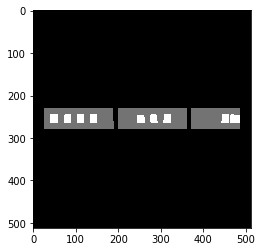

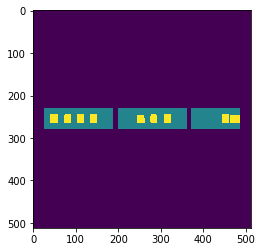

40


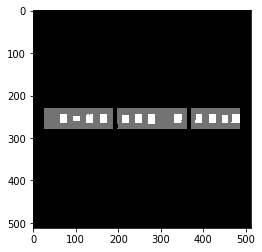

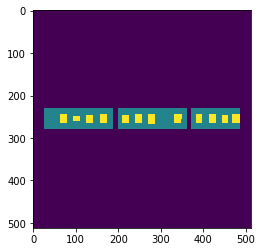

41


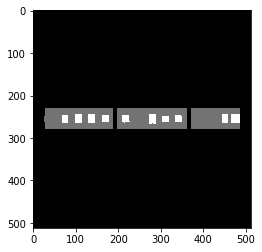

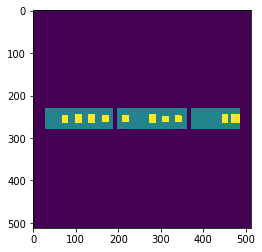

42


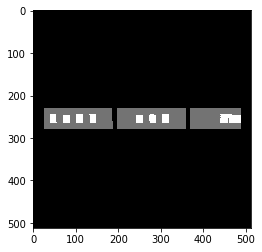

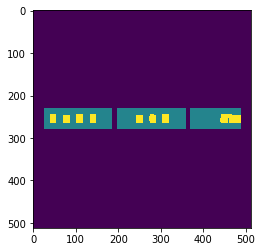

43


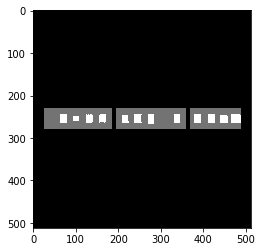

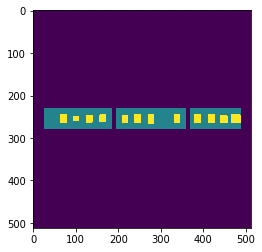

44


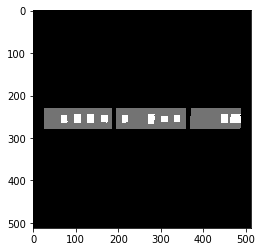

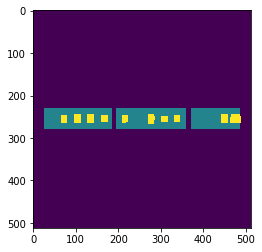

45


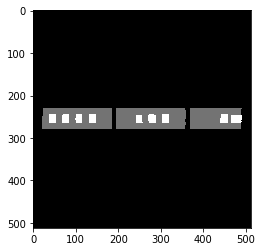

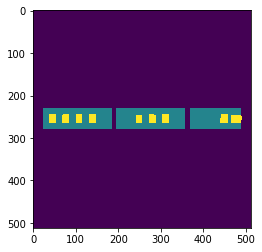

46


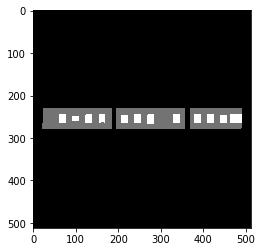

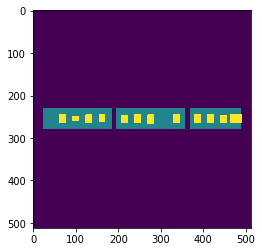

47


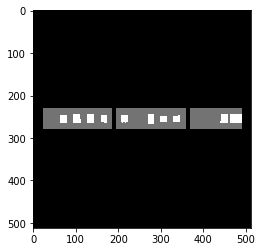

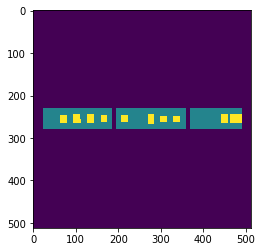

48


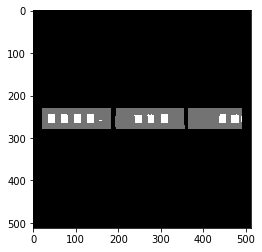

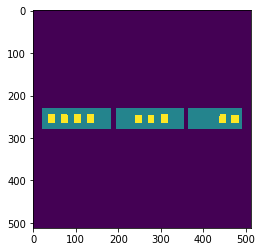

49


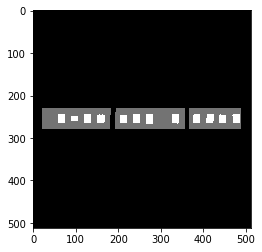

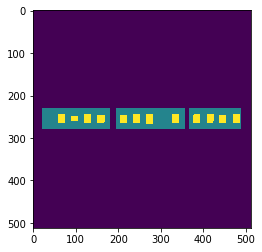

50


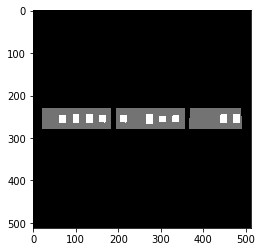

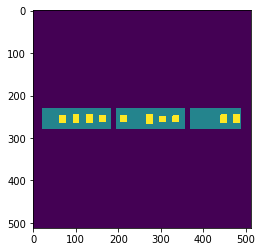

51


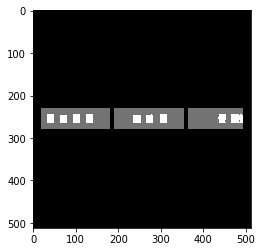

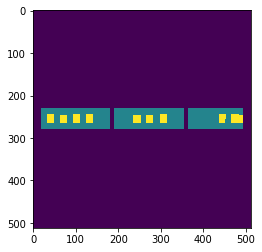

52


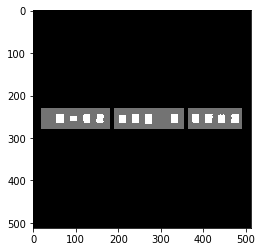

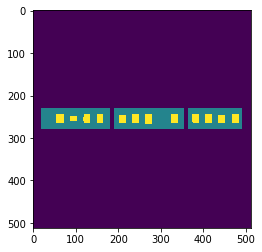

53


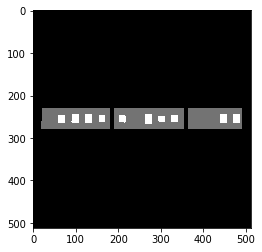

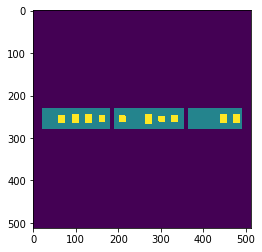

54


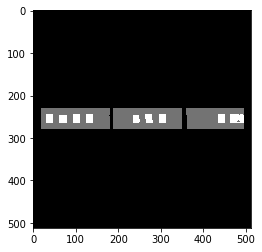

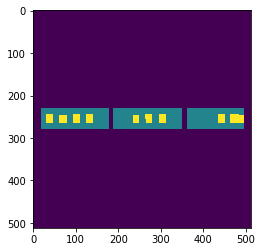

55


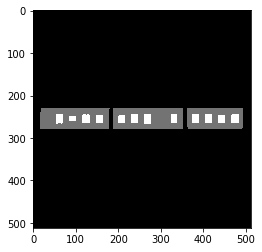

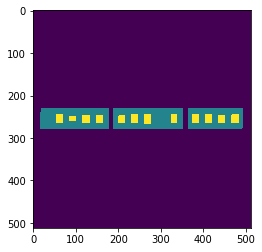

56


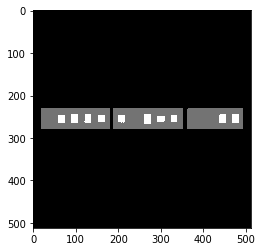

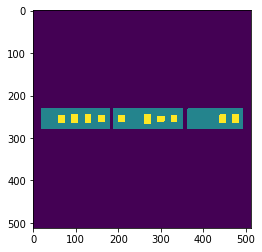

57


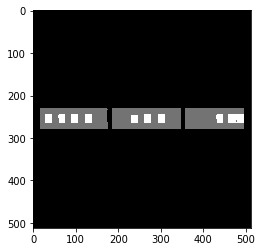

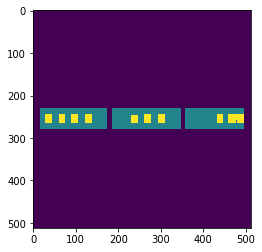

58


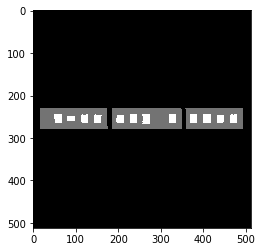

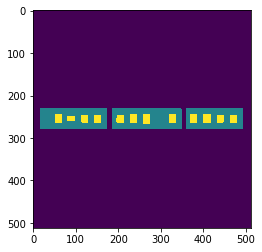

59


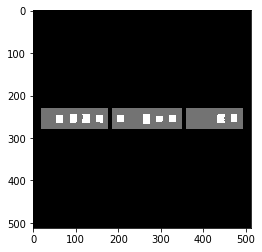

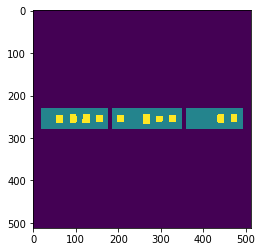

60


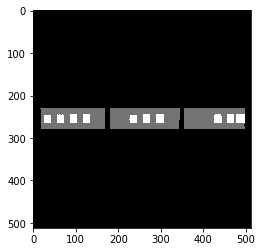

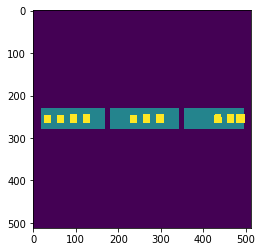

61


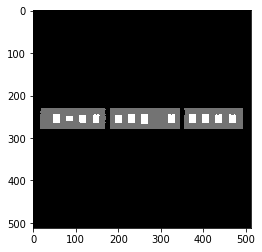

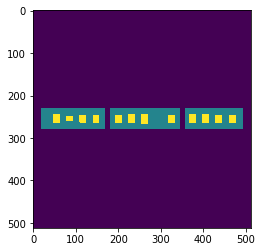

62


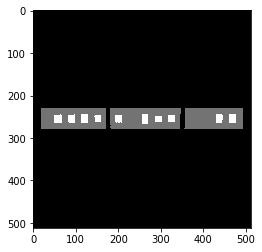

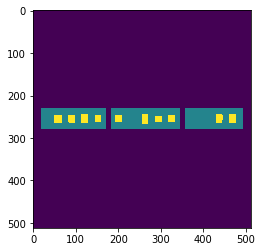

63


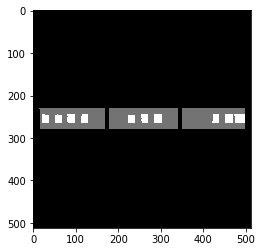

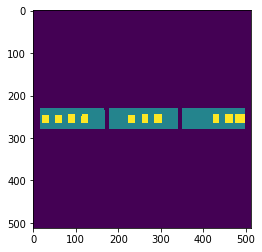

64


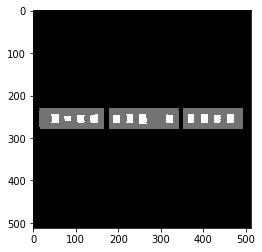

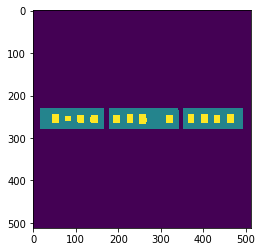

65


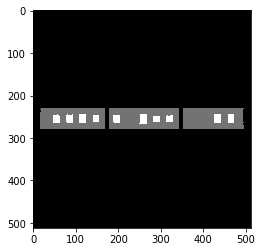

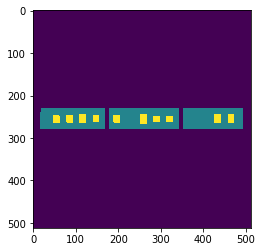

66


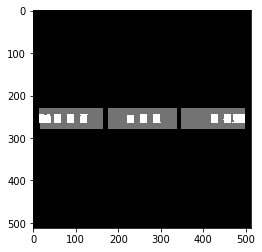

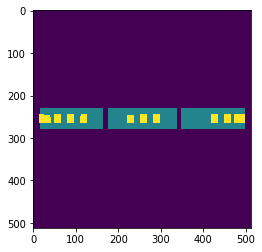

67


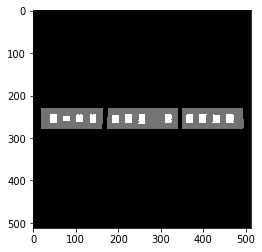

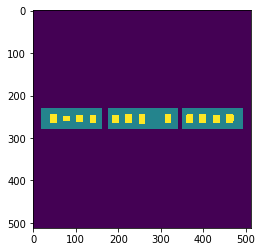

68


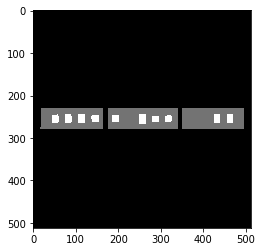

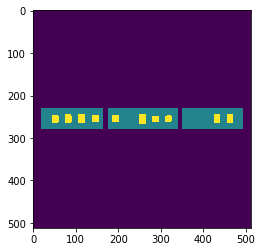

69


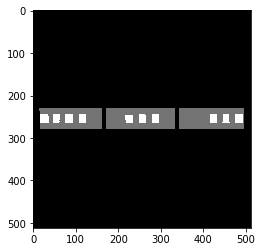

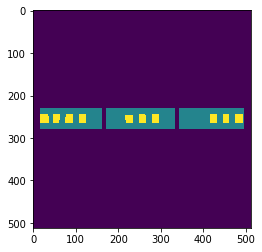

70


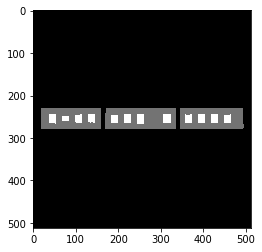

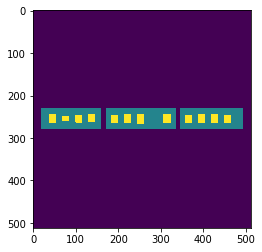

71


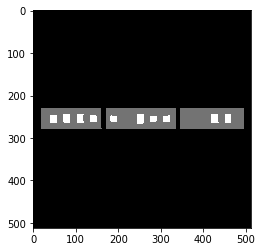

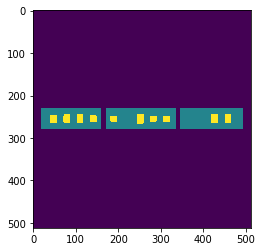

72


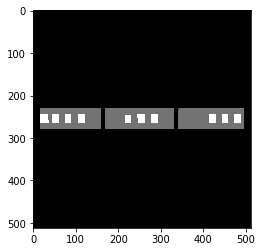

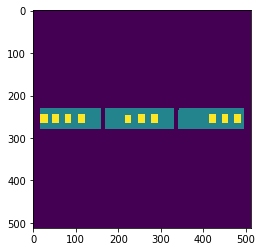

73


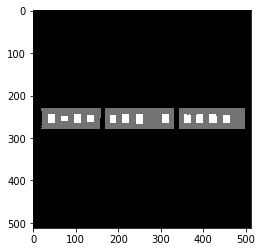

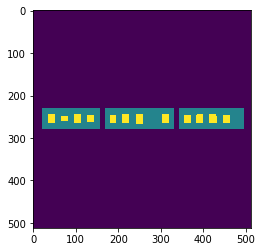

74


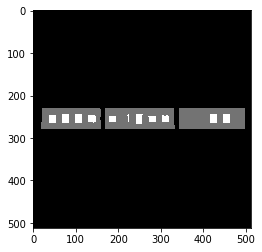

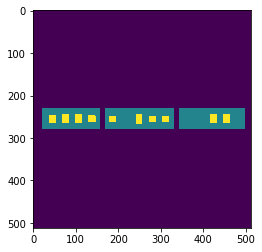

75


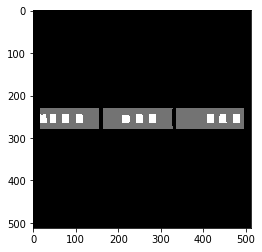

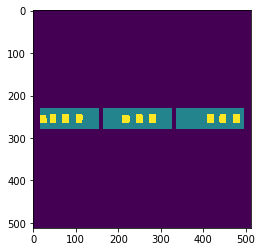

76


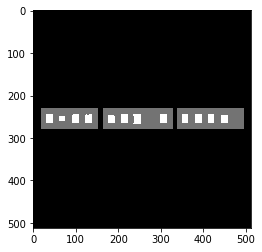

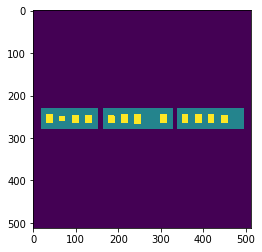

77


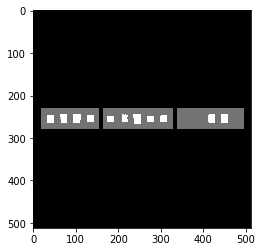

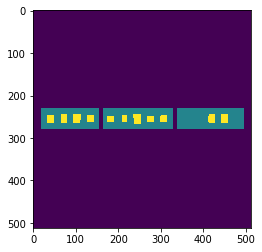

78


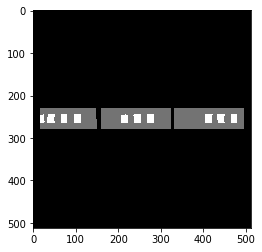

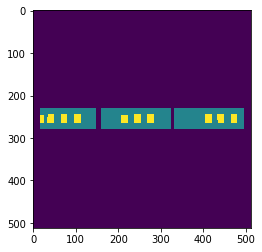

79


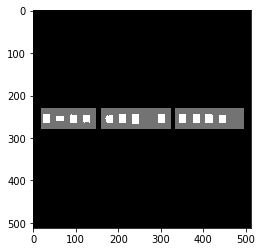

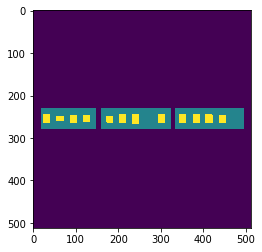

80


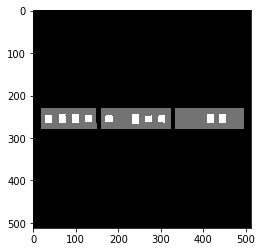

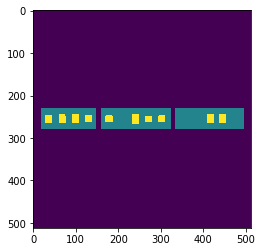

81


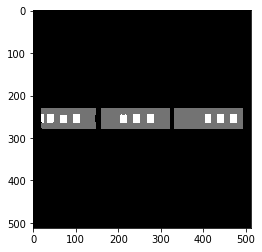

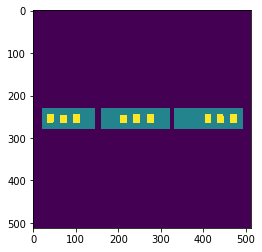

82


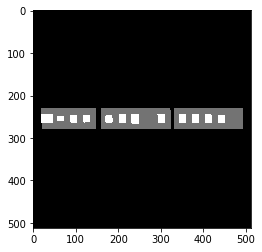

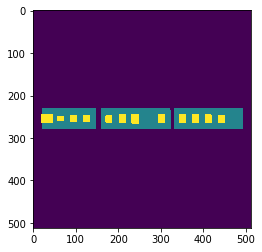

83


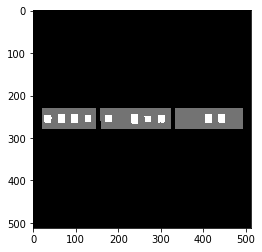

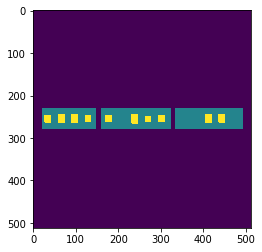

84


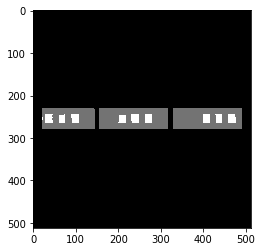

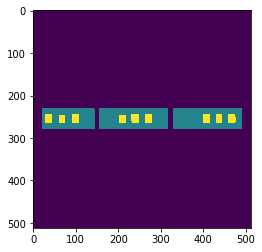

85


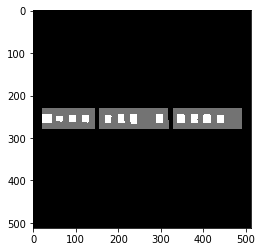

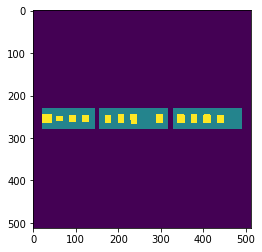

86


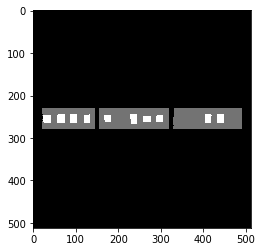

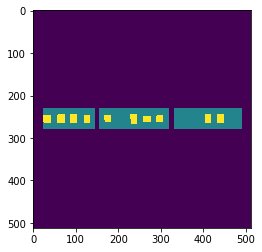

87


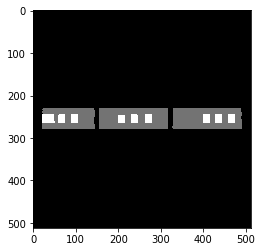

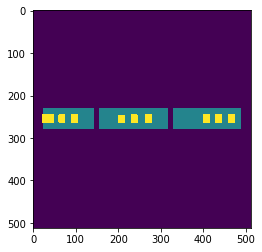

88


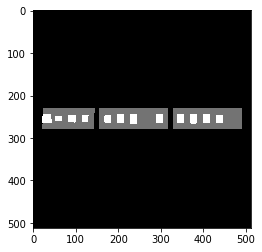

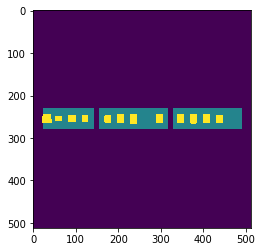

89


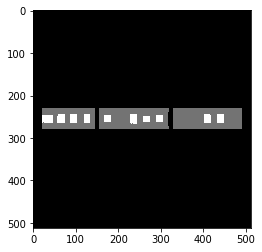

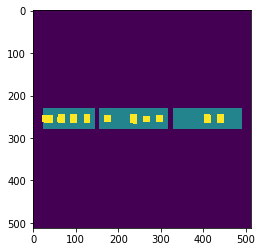

90


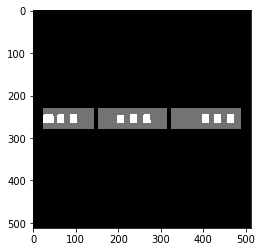

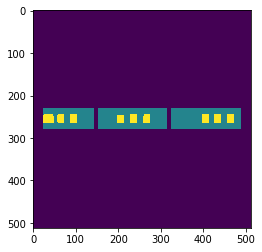

91


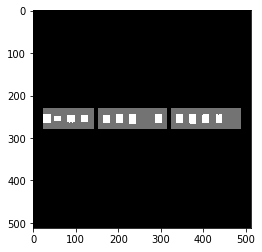

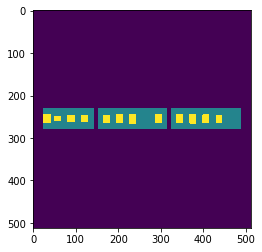

92


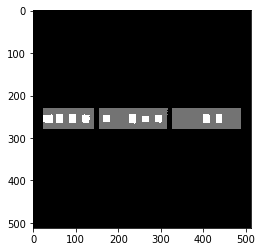

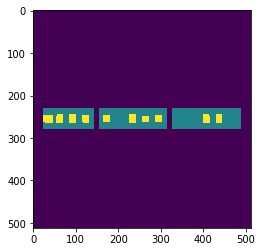

93


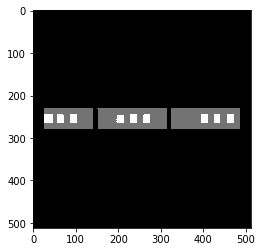

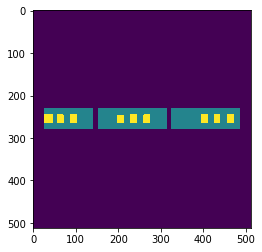

94


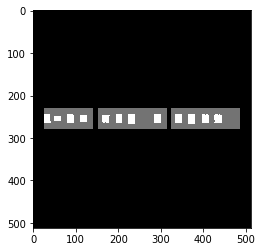

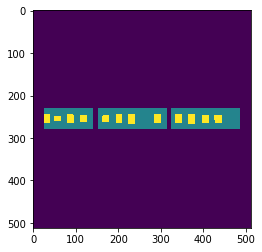

95


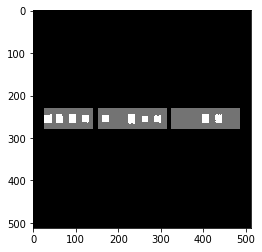

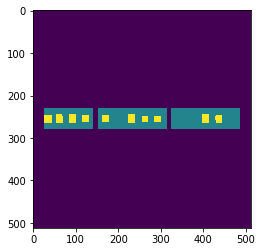

96


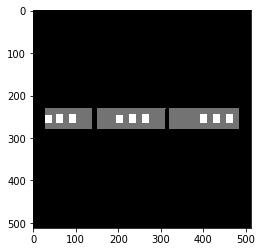

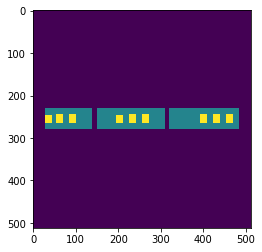

97


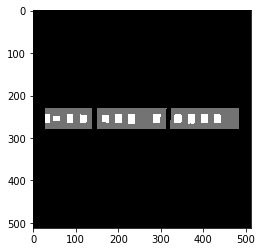

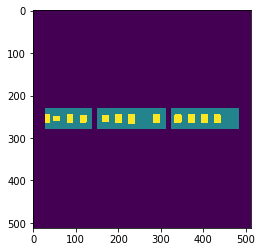

98


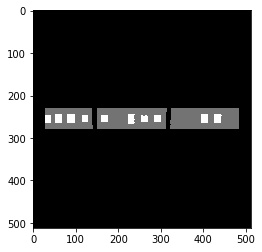

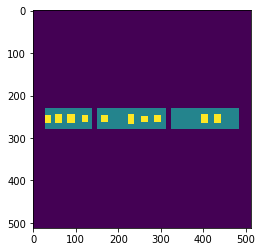

99


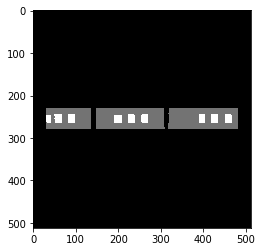

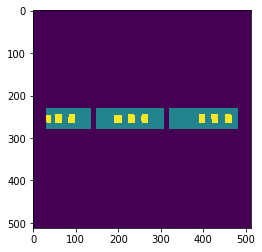

100


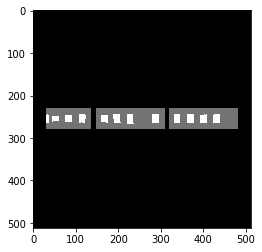

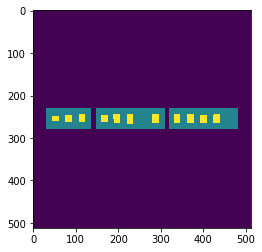

101


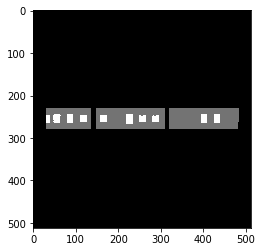

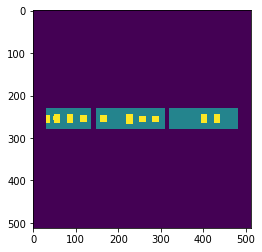

102


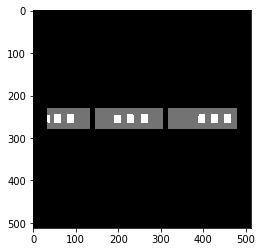

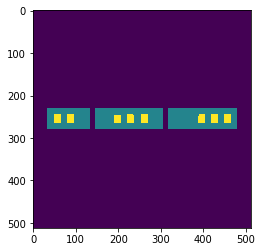

103


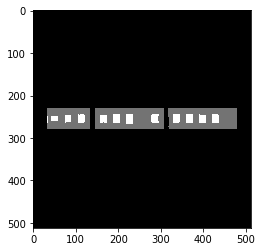

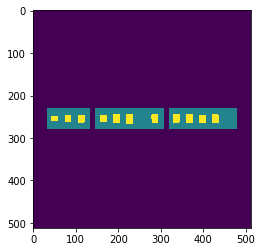

104


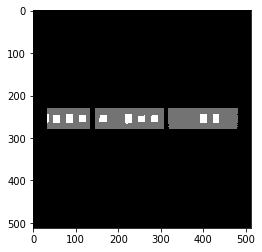

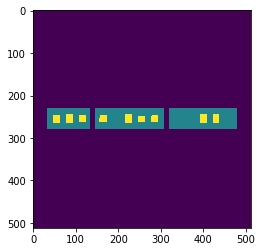

105


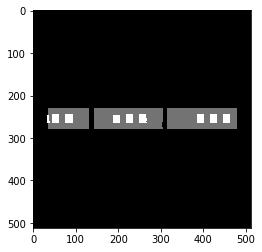

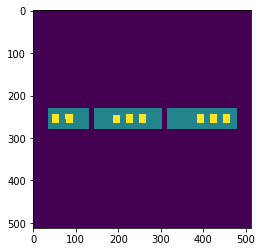

106


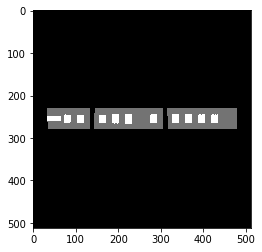

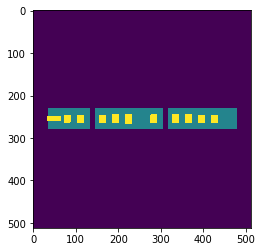

107


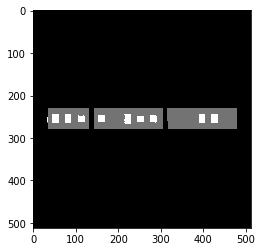

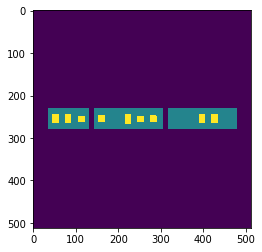

108


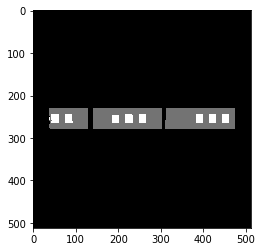

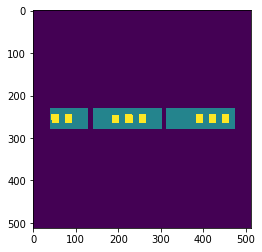

109


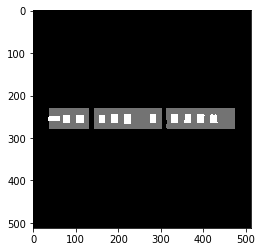

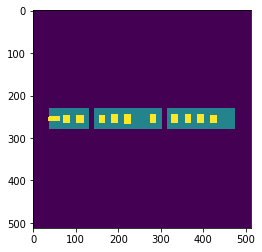

110


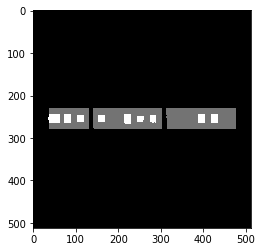

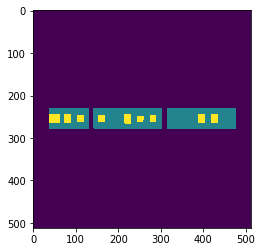

111


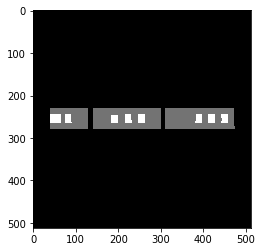

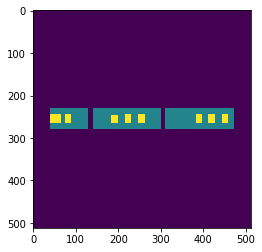

112


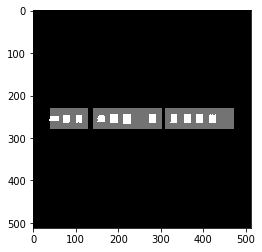

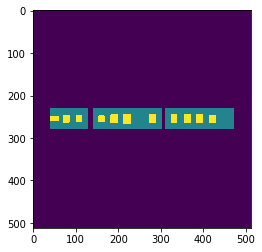

113


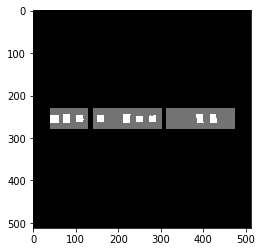

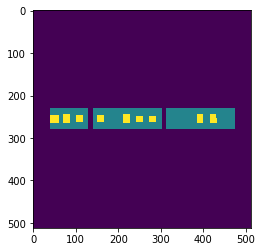

114


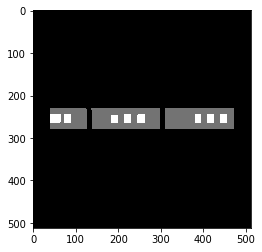

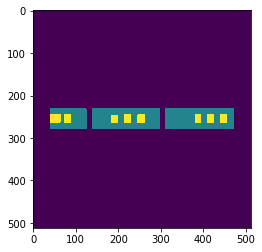

115


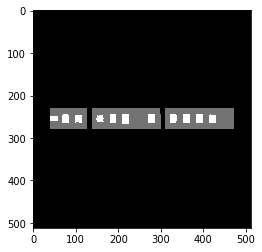

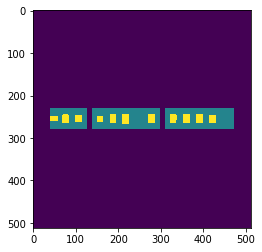

116


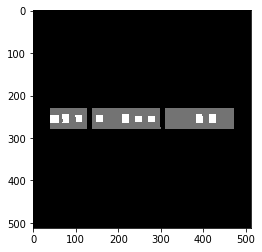

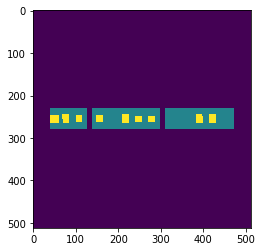

117


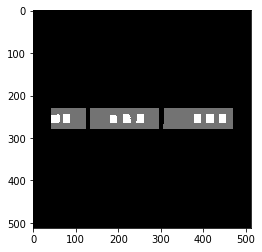

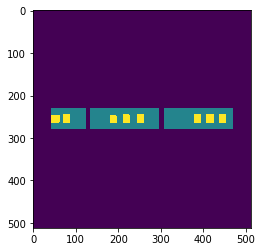

118


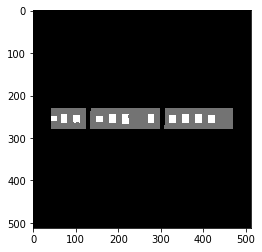

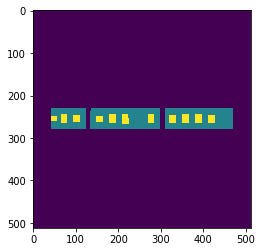

119


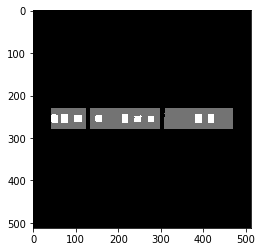

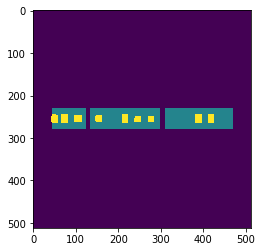

120


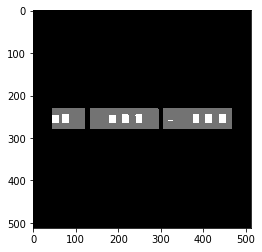

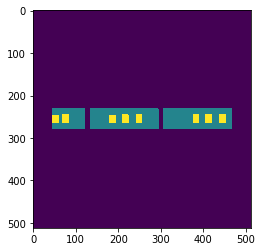

121


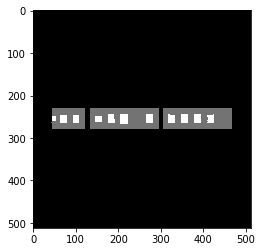

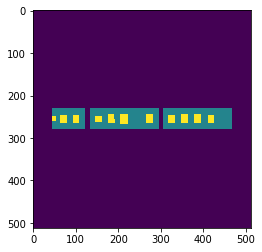

122


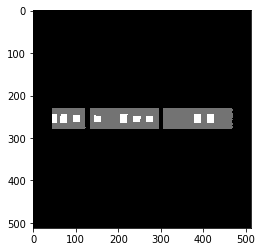

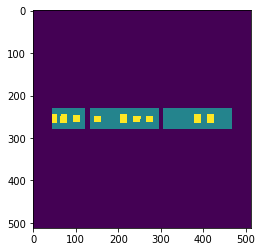

123


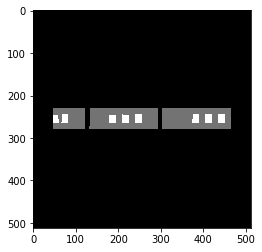

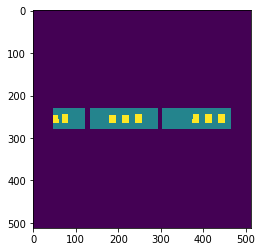

124


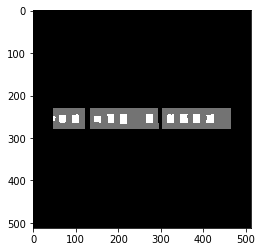

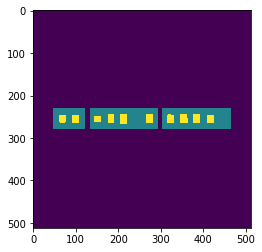

125


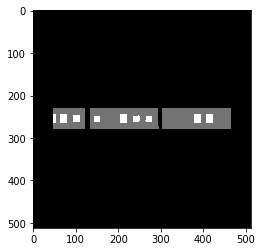

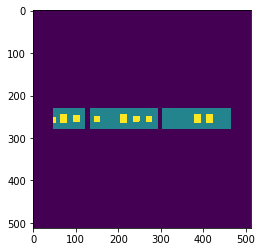

126


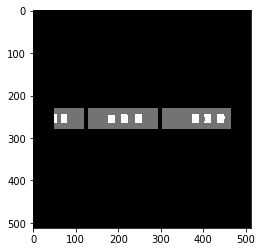

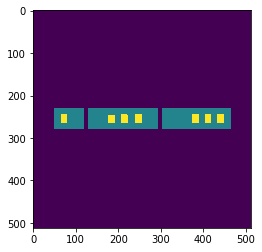

127


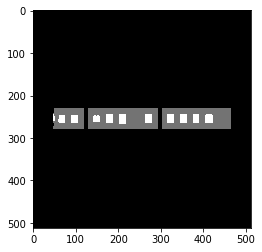

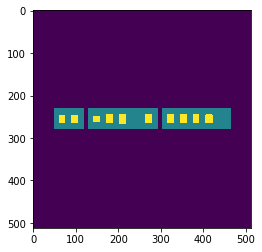

128


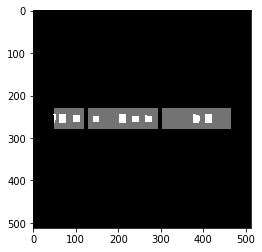

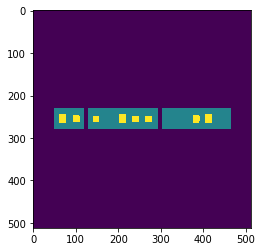

129


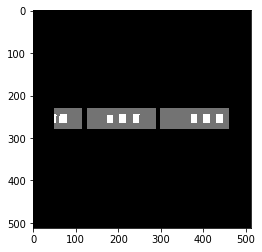

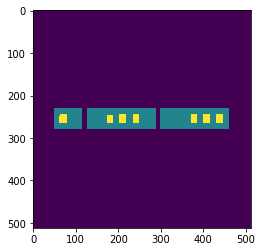

130


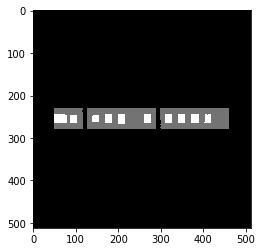

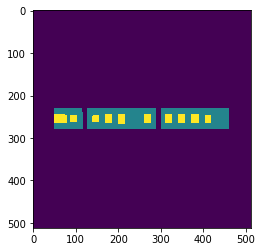

131


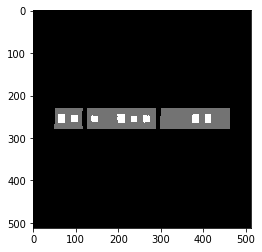

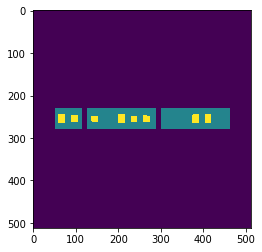

132


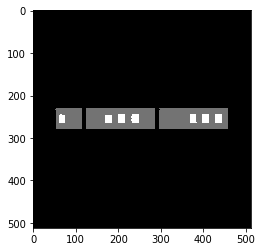

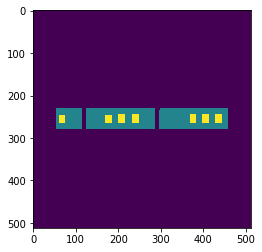

133


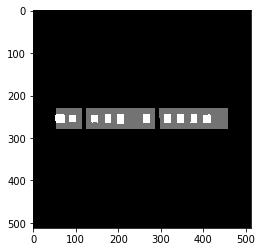

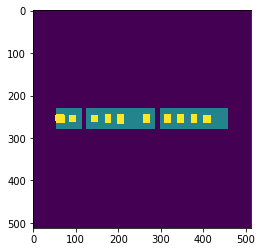

134


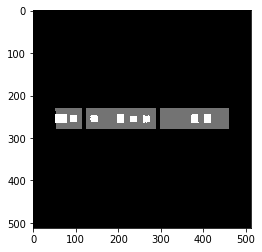

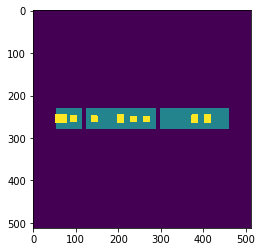

135


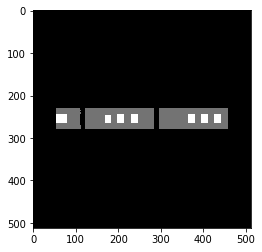

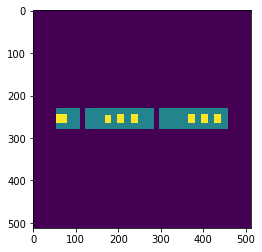

136


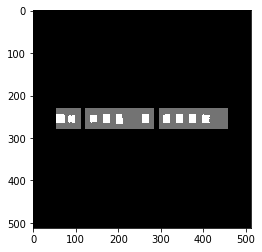

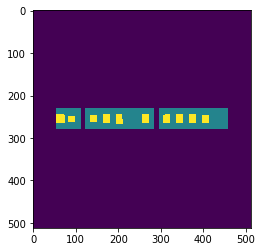

137


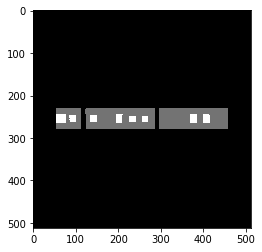

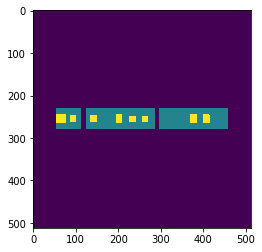

138


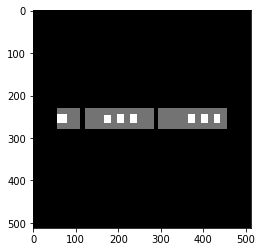

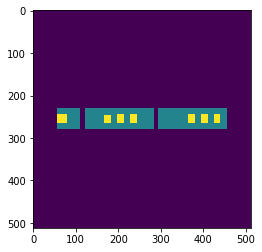

139


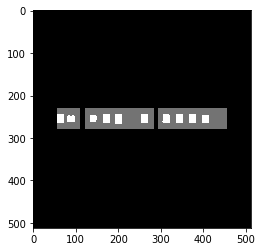

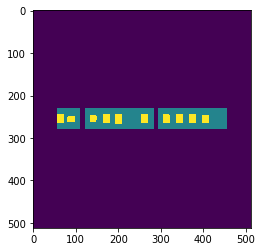

140


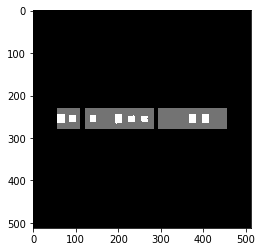

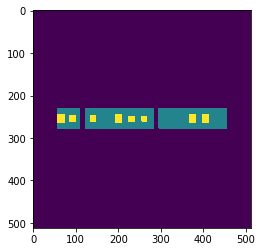

141


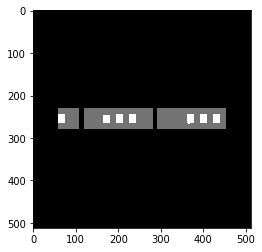

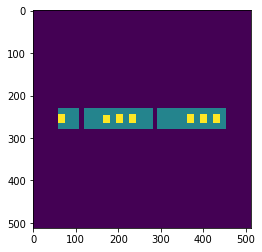

142


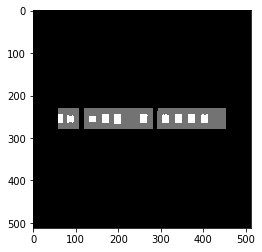

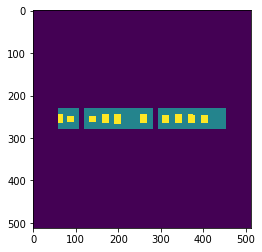

143


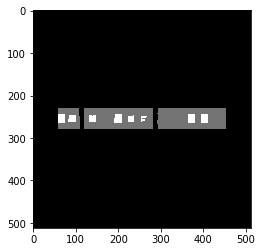

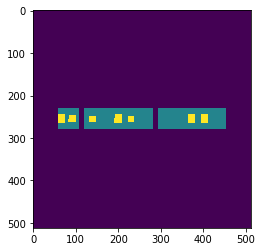

144


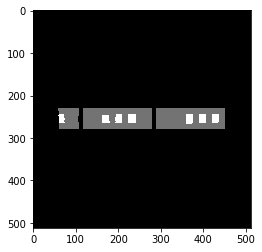

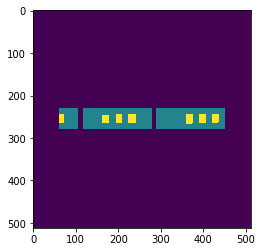

145


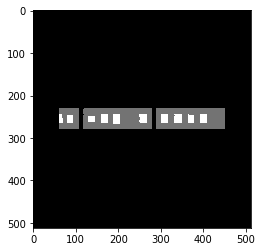

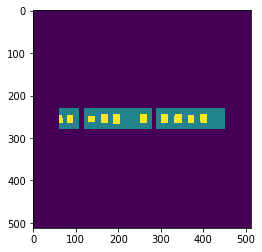

146


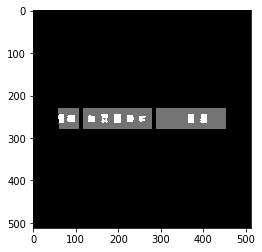

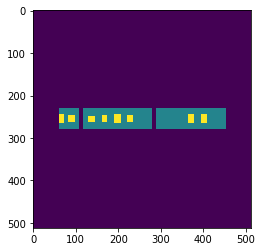

0


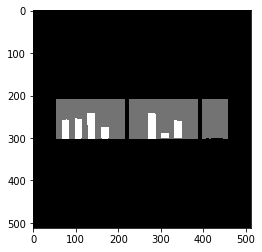

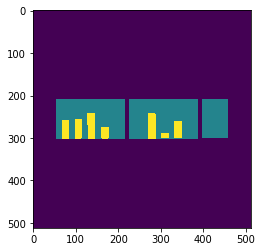

1


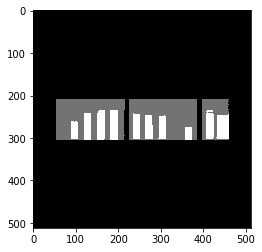

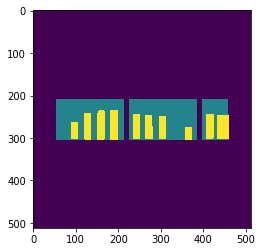

2


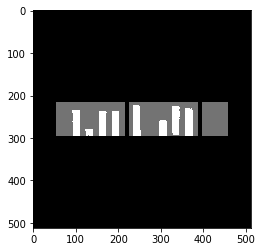

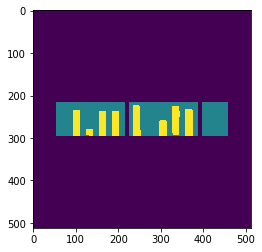

3


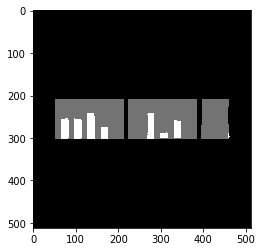

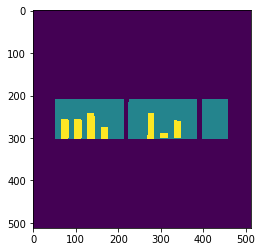

4


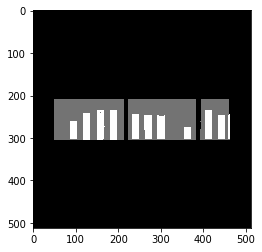

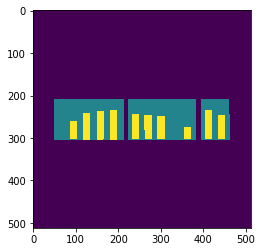

5


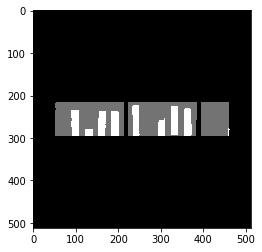

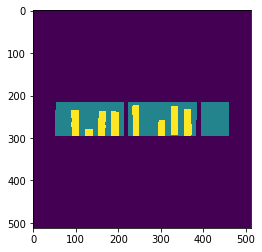

6


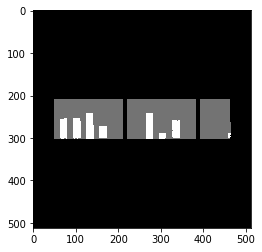

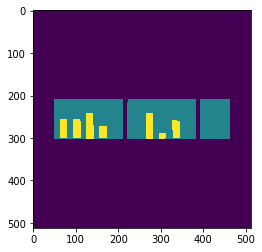

7


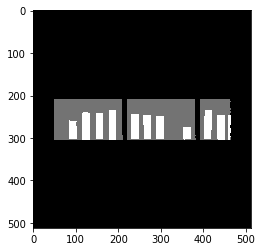

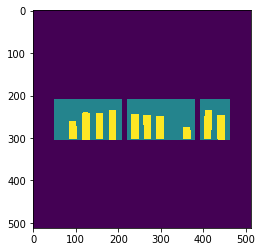

8


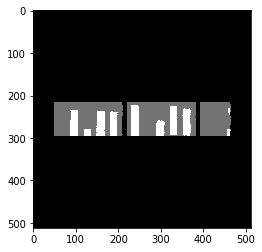

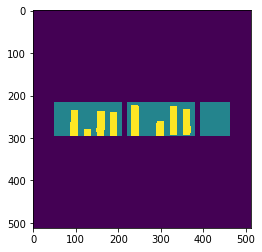

9


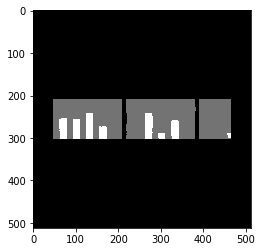

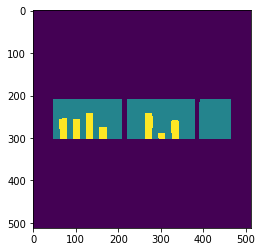

10


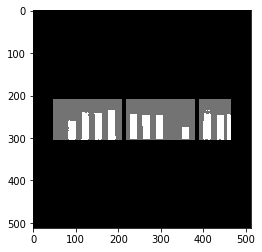

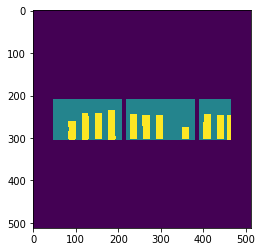

11


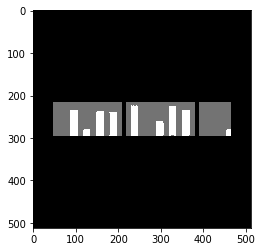

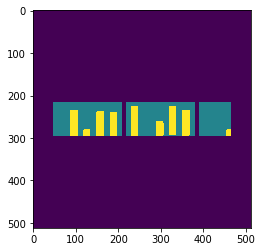

12


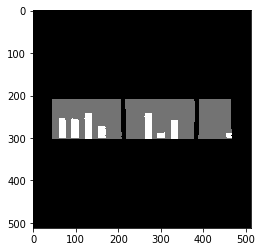

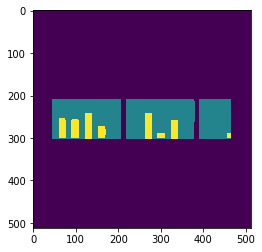

13


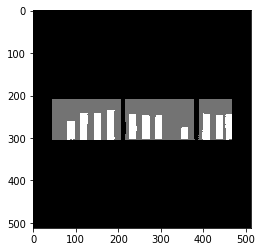

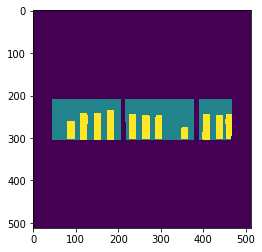

14


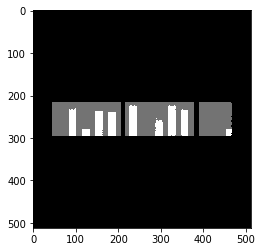

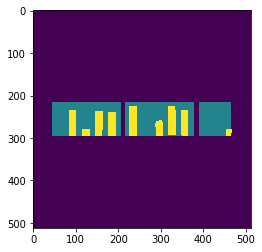

15


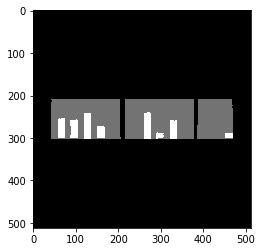

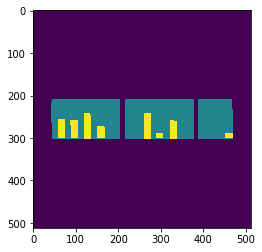

16


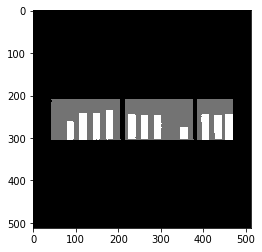

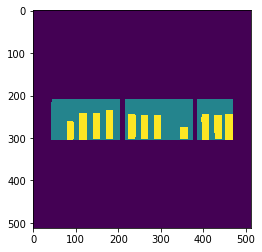

17


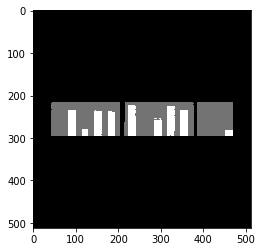

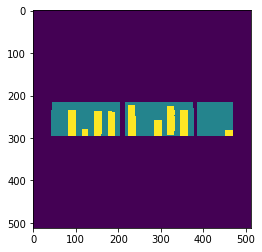

18


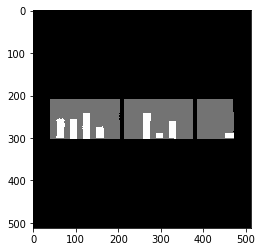

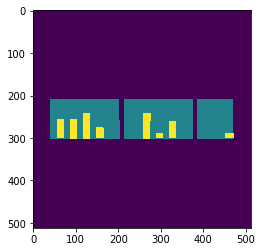

19


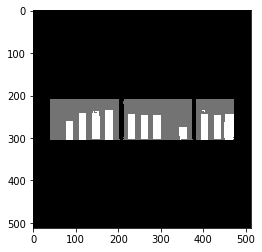

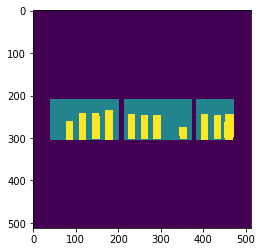

20


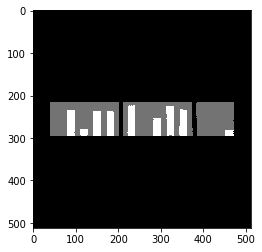

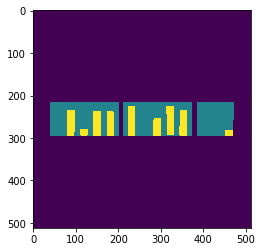

21


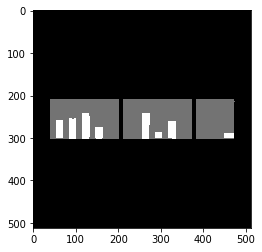

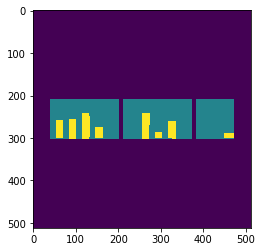

22


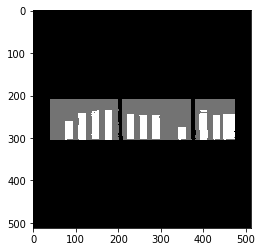

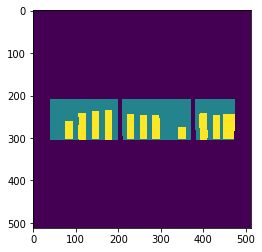

23


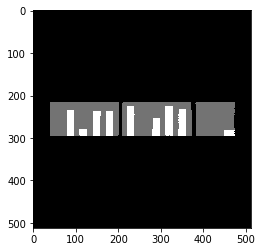

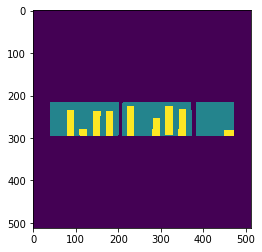

24


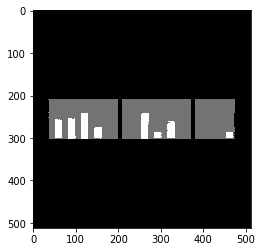

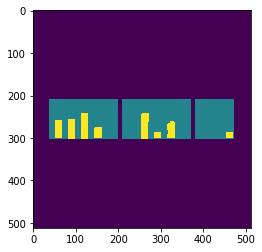

25


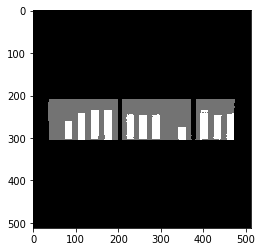

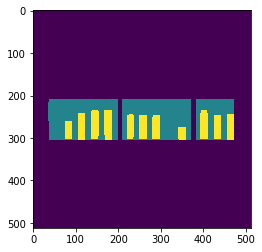

26


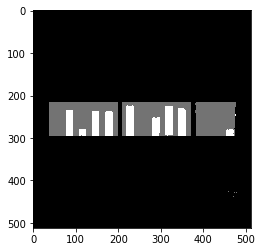

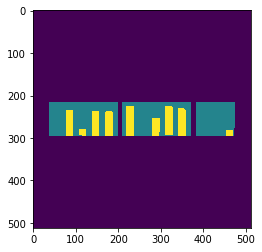

27


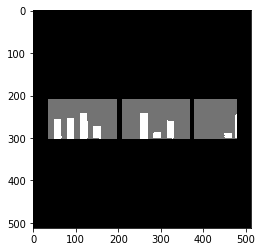

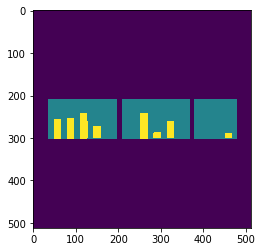

28


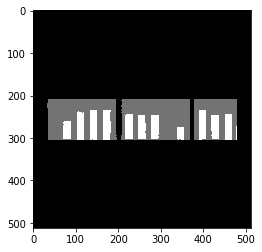

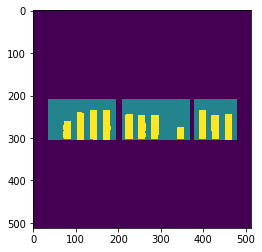

29


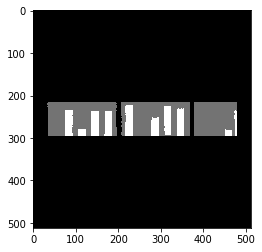

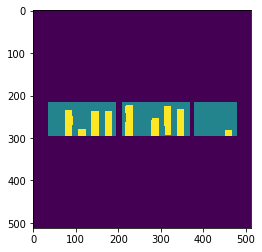

30


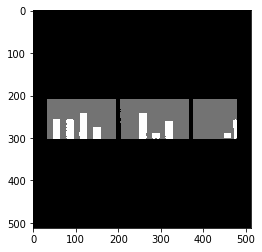

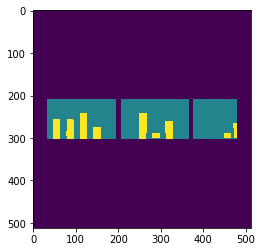

31


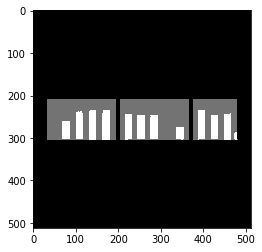

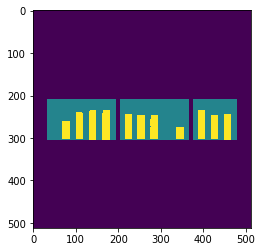

32


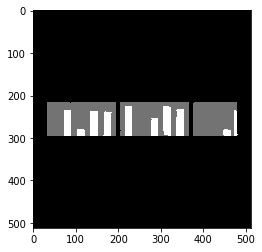

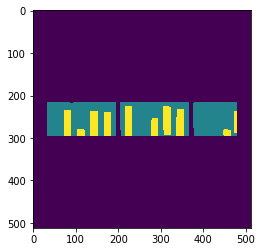

33


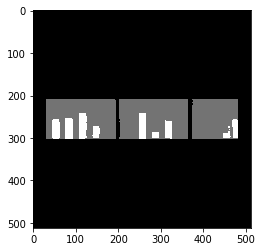

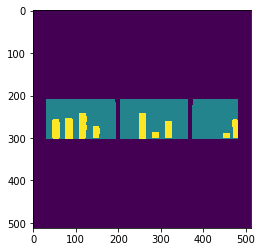

34


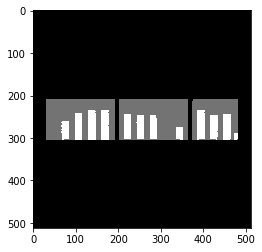

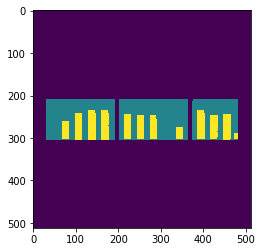

35


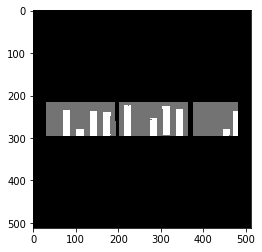

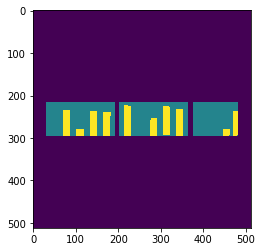

36


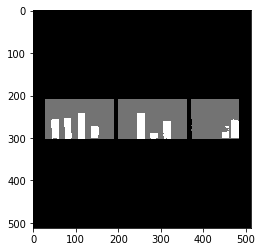

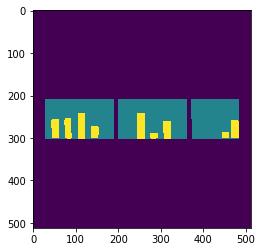

37


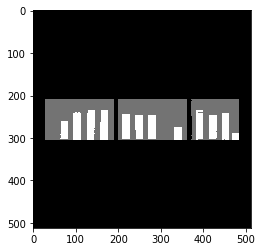

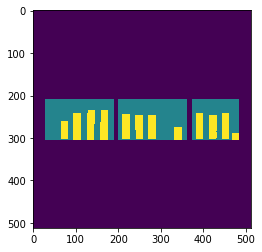

38


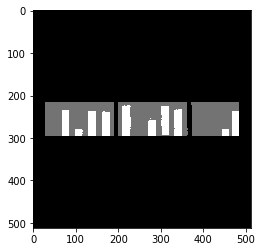

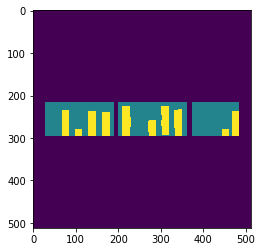

39


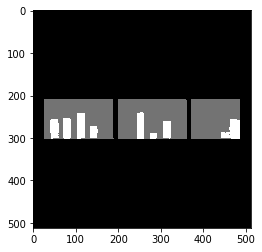

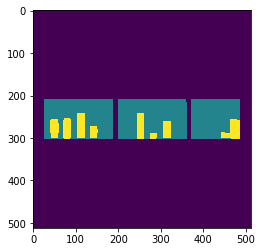

40


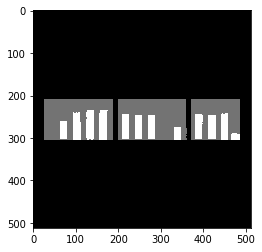

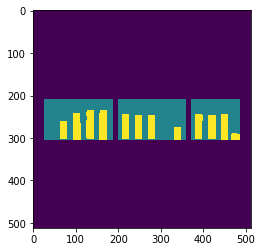

41


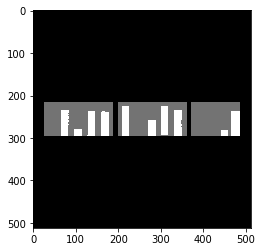

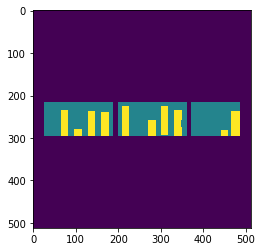

42


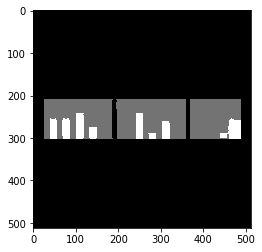

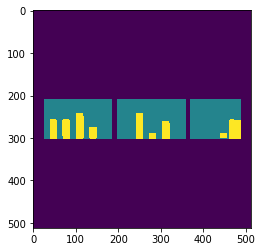

43


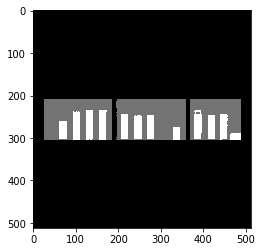

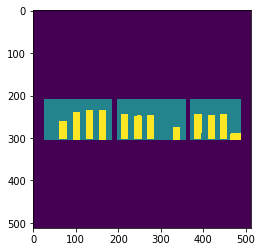

44


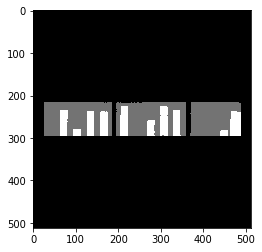

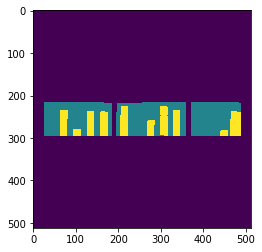

45


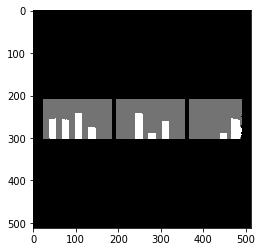

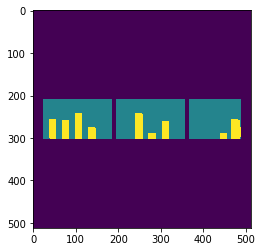

46


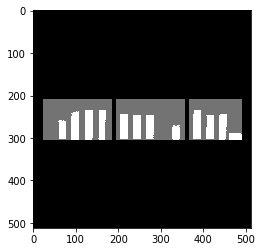

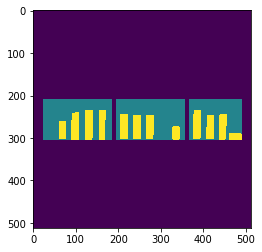

47


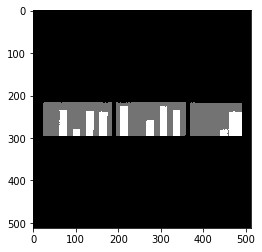

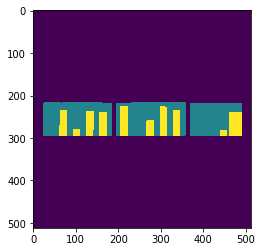

48


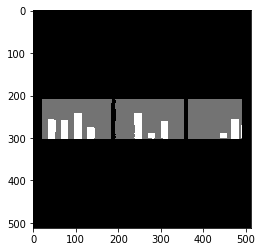

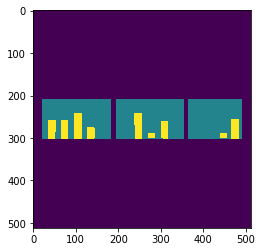

49


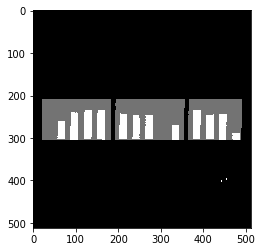

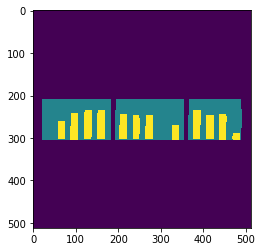

50


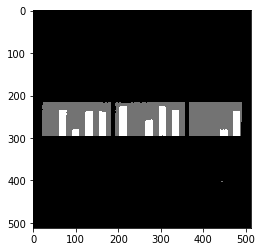

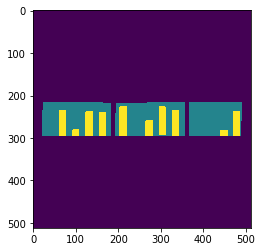

51


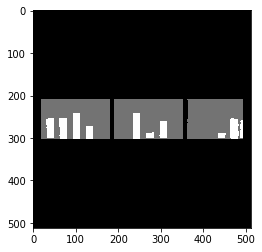

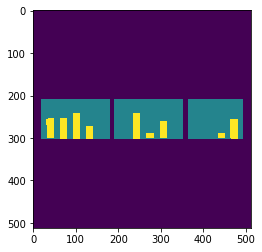

52


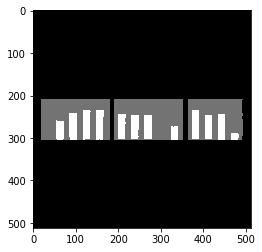

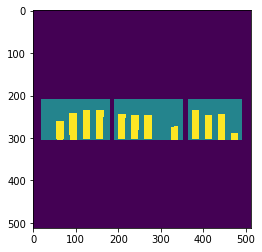

53


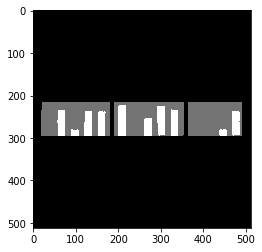

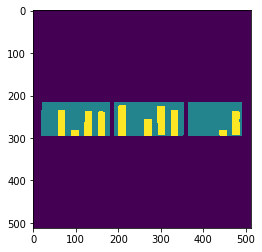

54


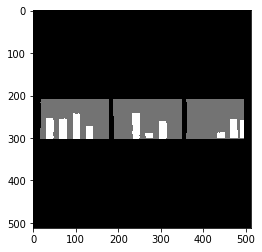

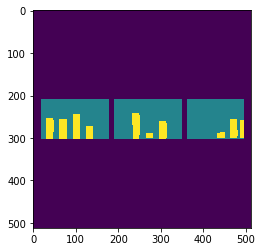

55


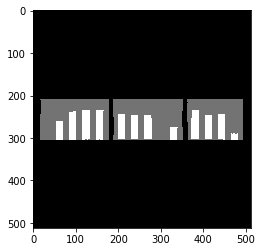

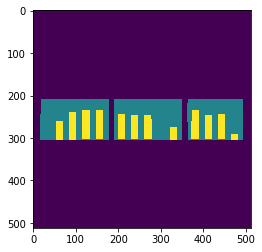

56


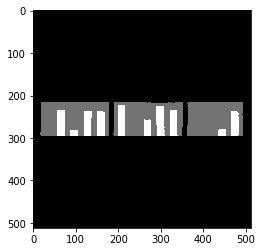

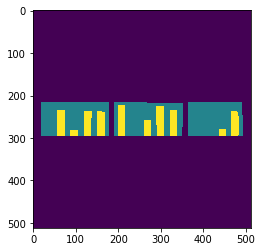

57


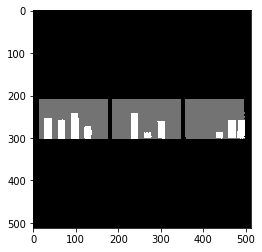

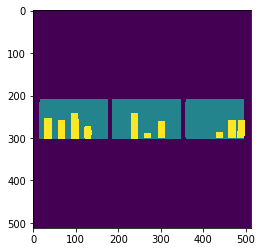

58


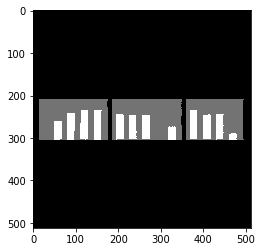

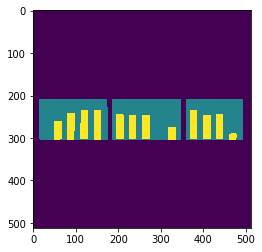

59


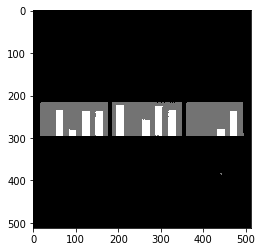

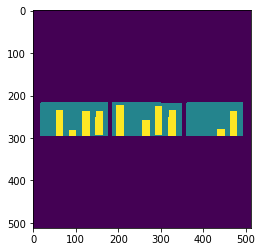

60


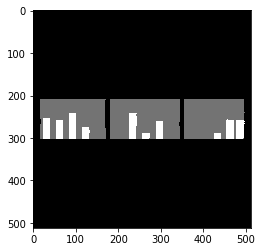

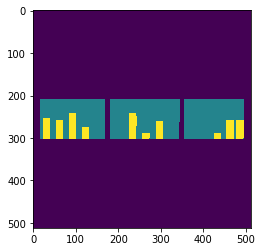

61


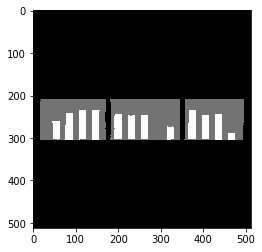

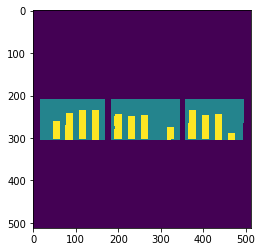

62


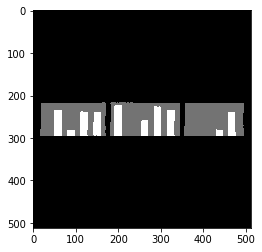

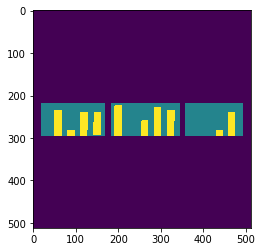

63


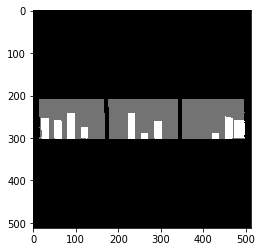

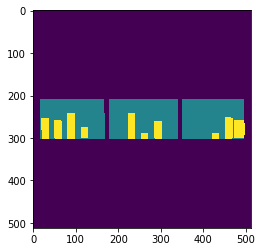

64


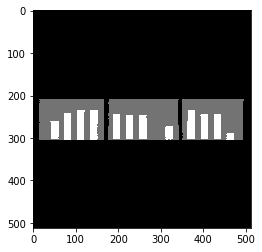

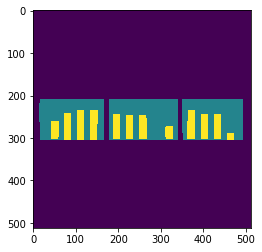

65


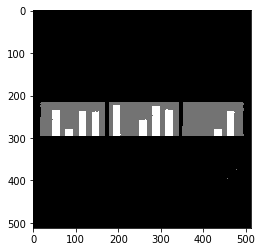

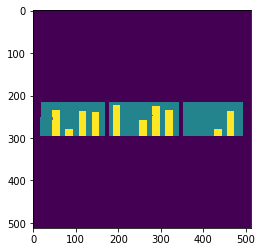

66


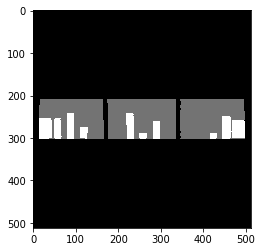

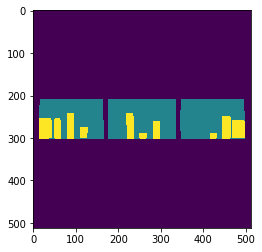

67


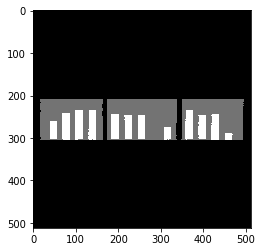

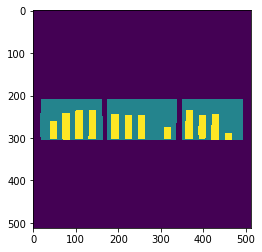

68


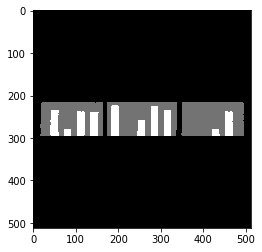

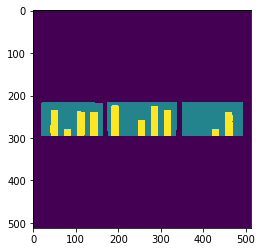

69


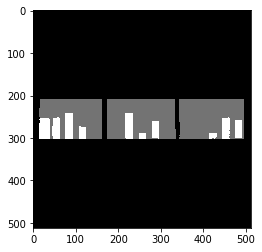

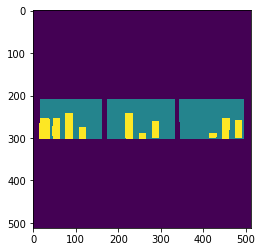

70


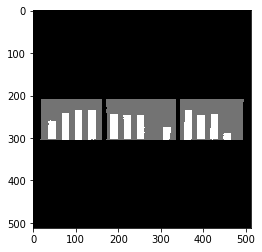

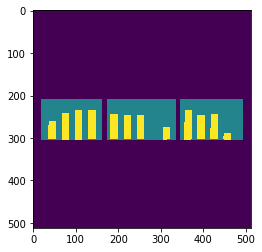

71


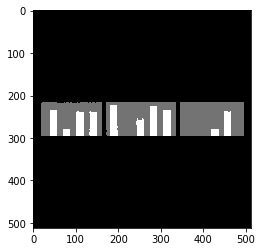

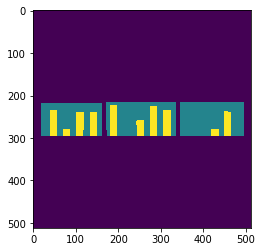

72


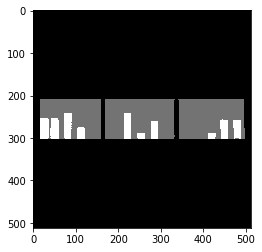

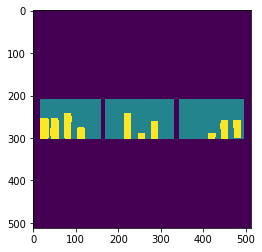

73


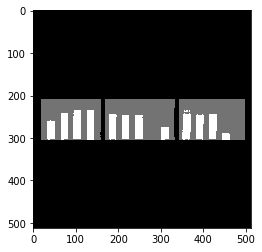

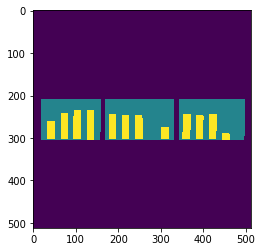

74


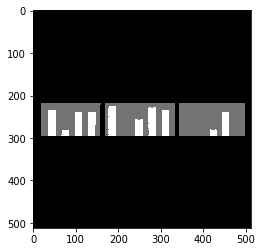

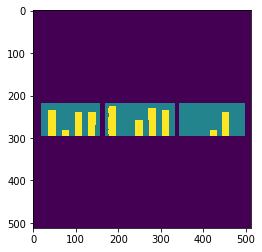

75


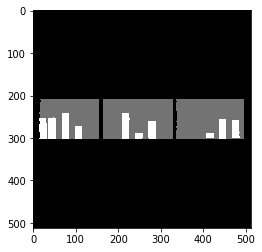

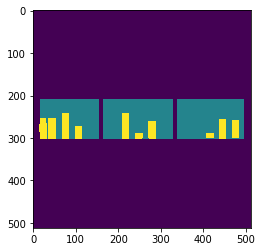

76


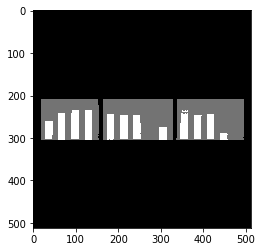

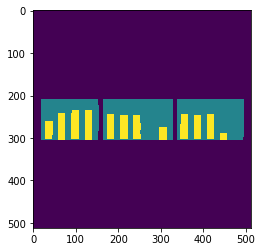

77


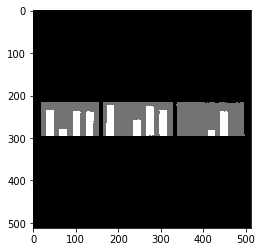

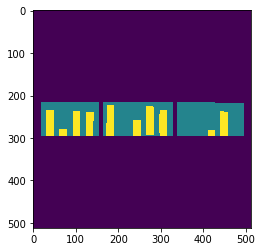

78


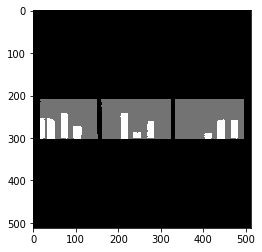

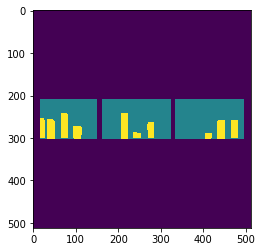

79


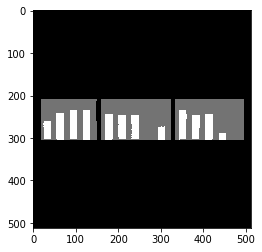

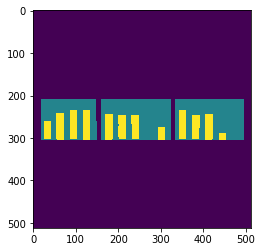

80


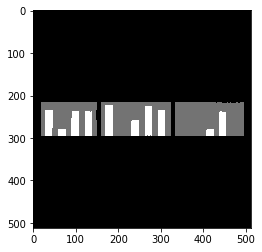

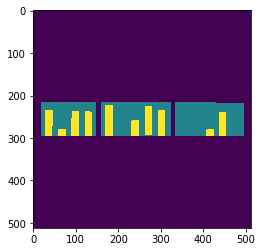

81


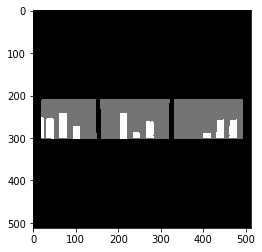

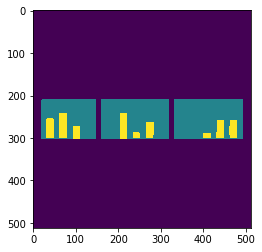

82


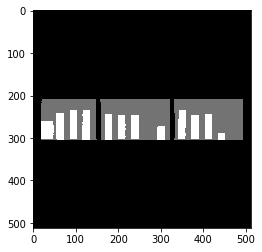

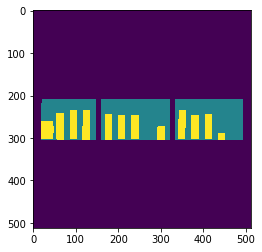

83


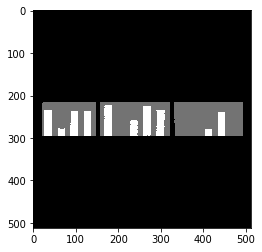

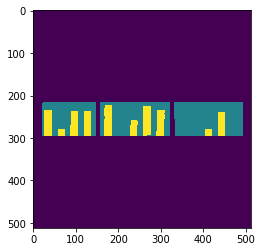

84


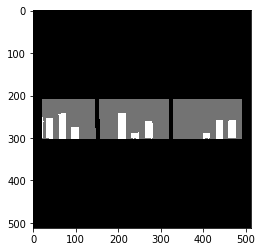

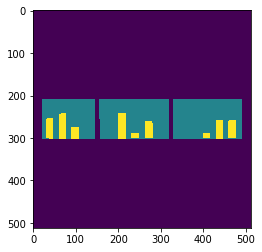

85


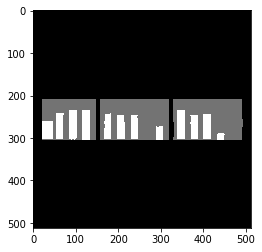

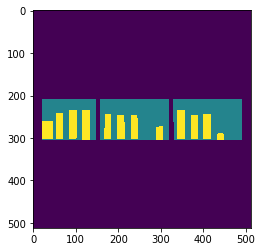

86


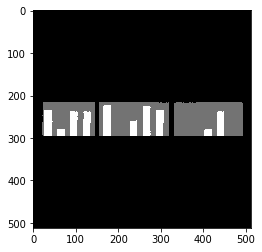

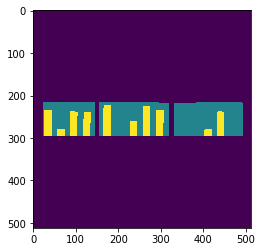

87


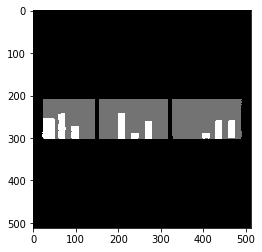

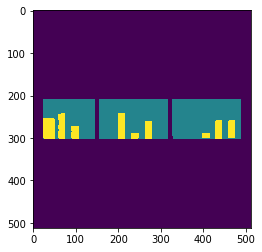

88


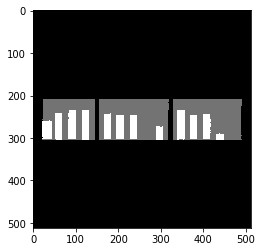

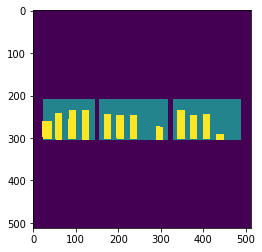

89


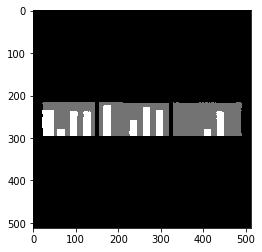

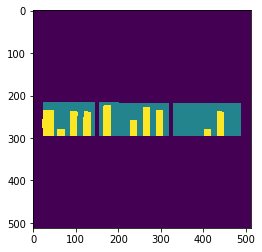

90


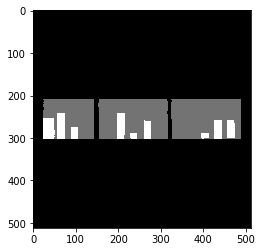

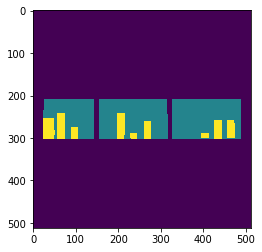

91


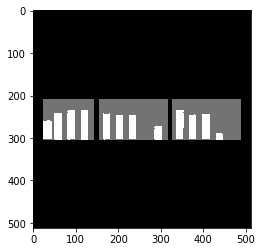

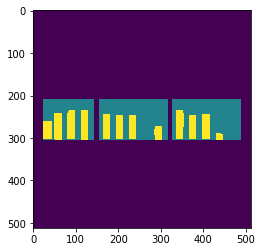

92


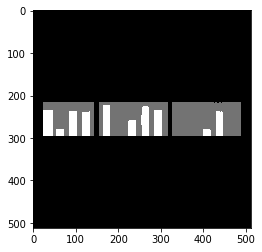

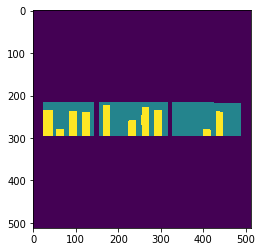

93


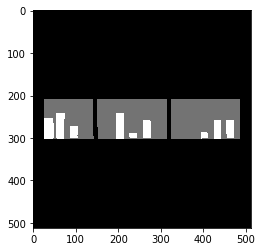

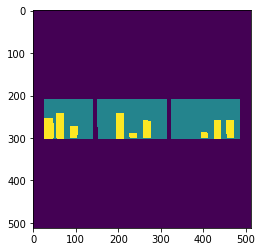

94


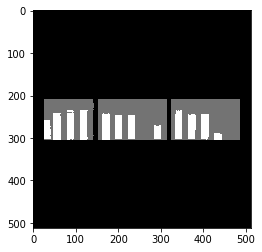

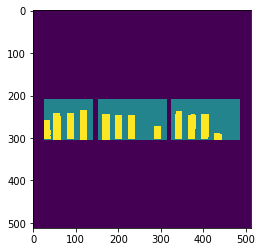

95


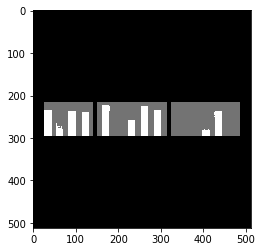

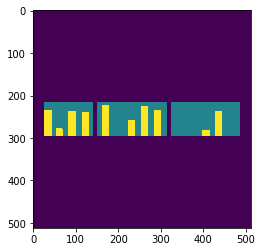

96


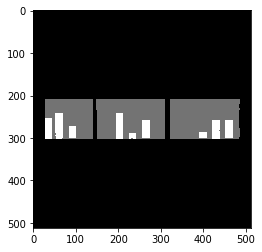

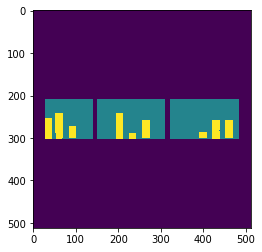

97


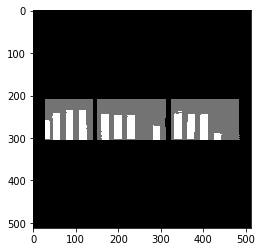

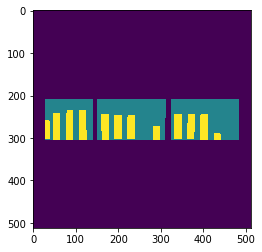

98


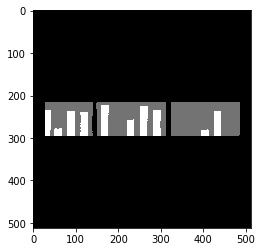

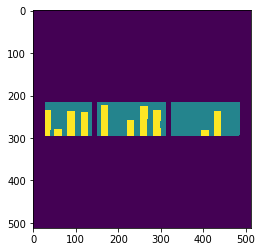

99


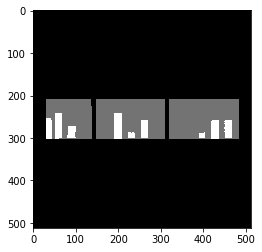

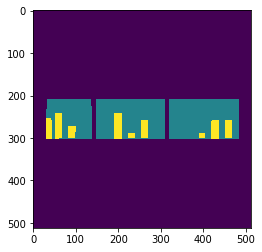

100


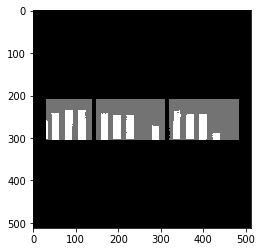

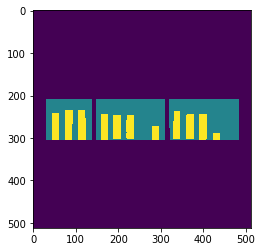

101


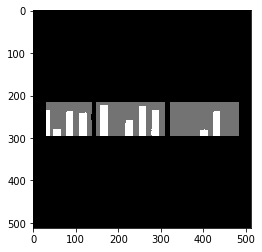

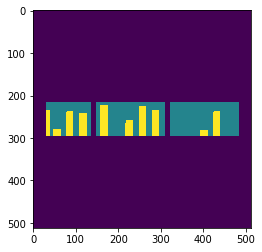

102


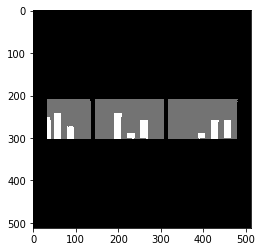

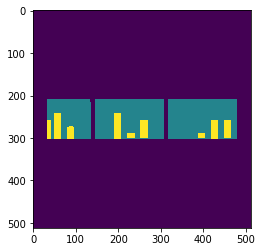

103


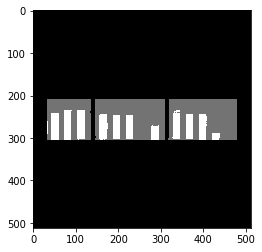

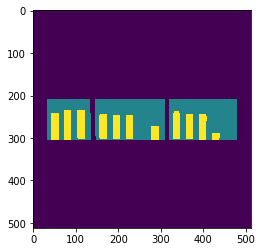

104


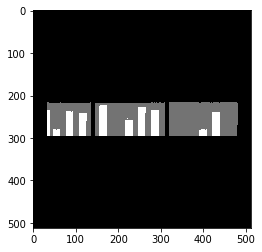

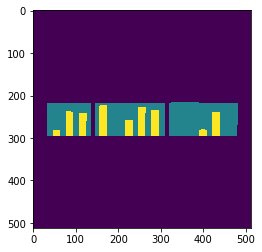

105


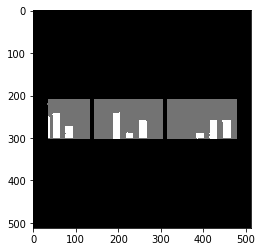

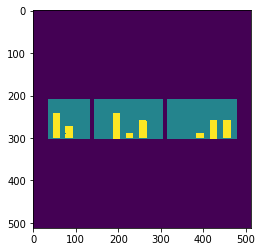

106


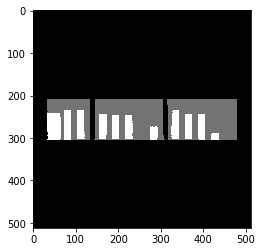

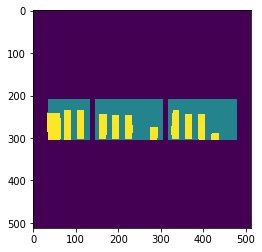

107


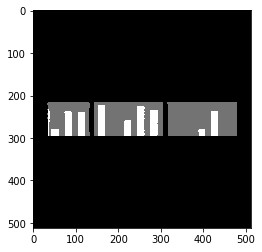

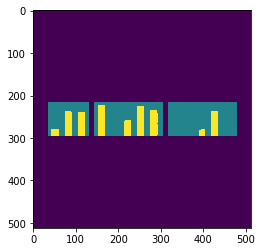

108


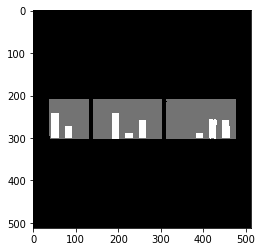

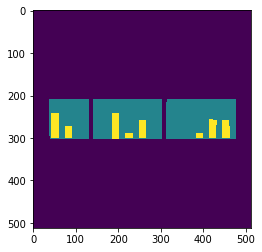

109


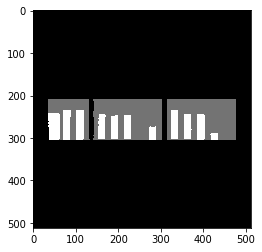

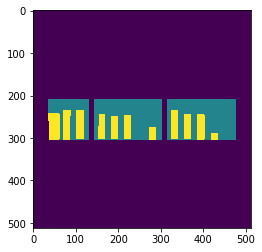

110


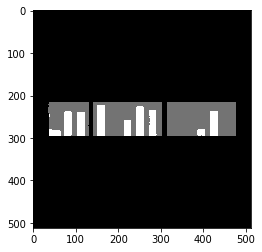

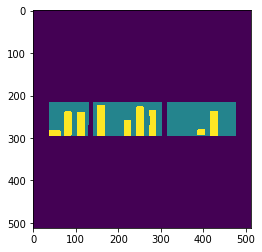

111


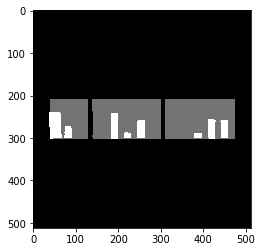

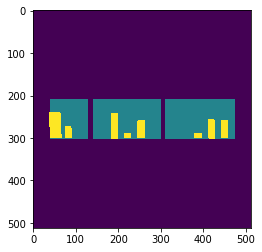

112


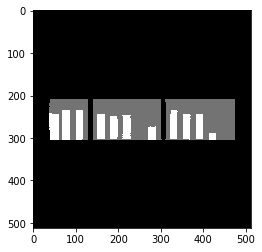

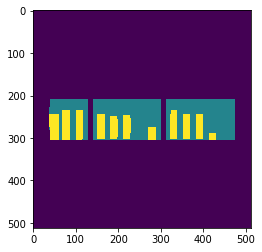

113


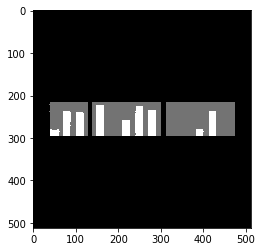

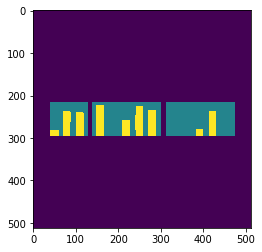

114


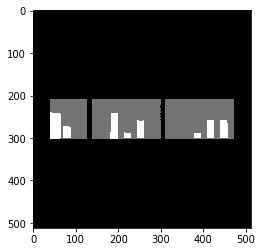

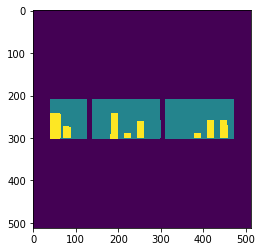

115


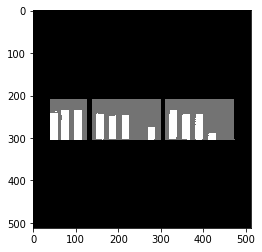

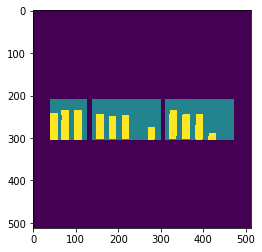

116


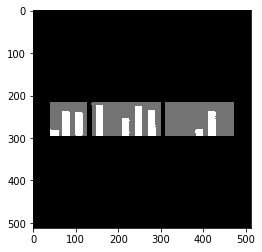

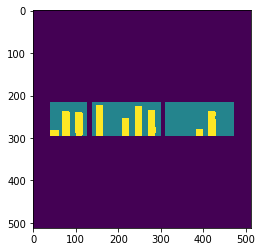

117


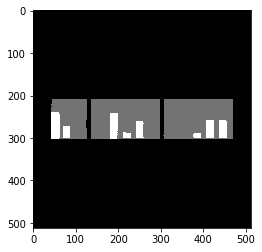

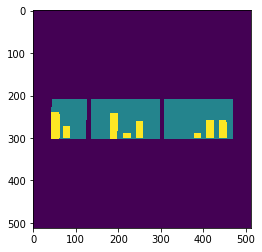

118


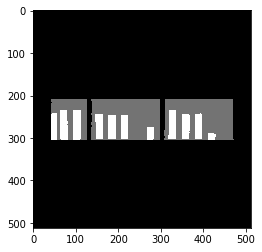

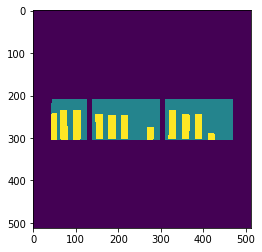

119


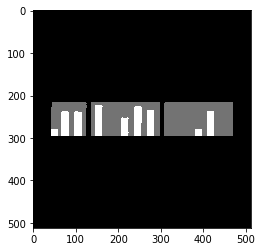

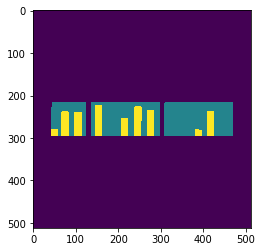

120


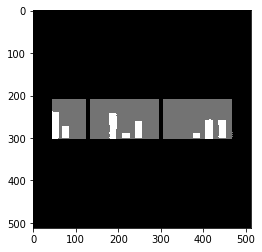

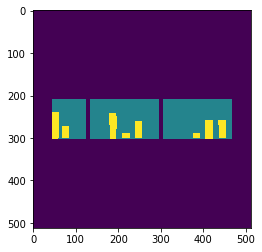

121


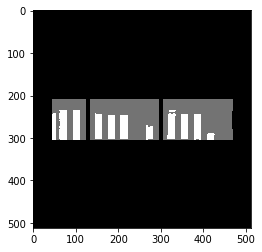

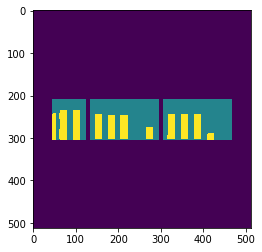

122


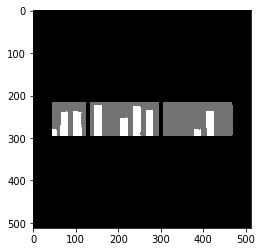

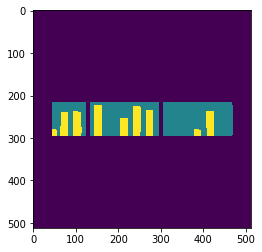

123


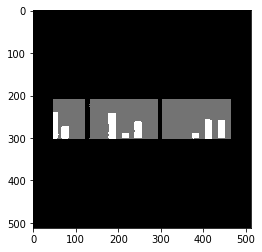

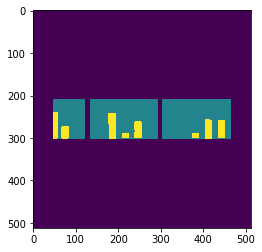

124


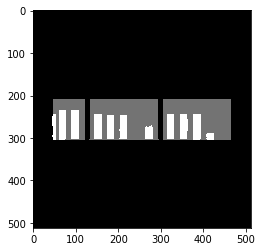

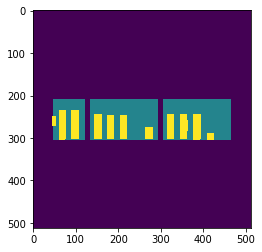

125


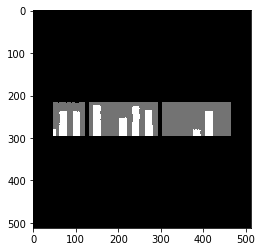

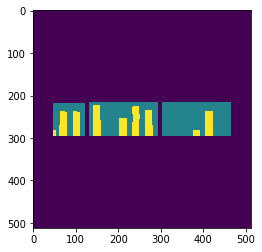

126


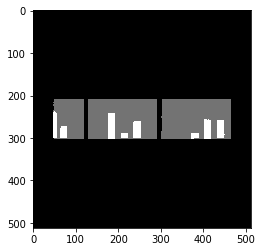

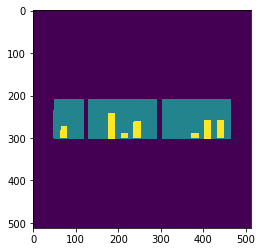

127


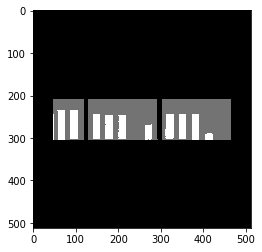

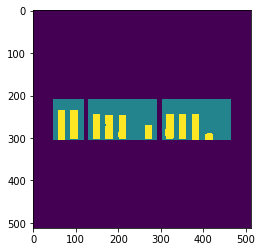

128


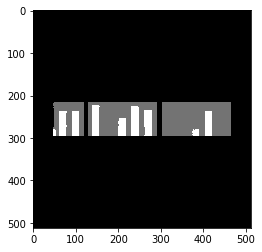

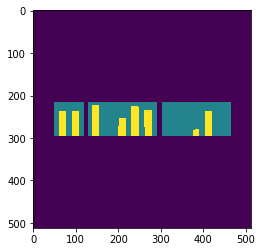

129


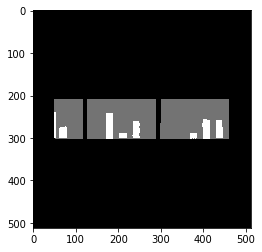

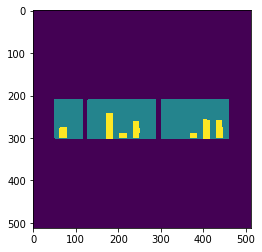

130


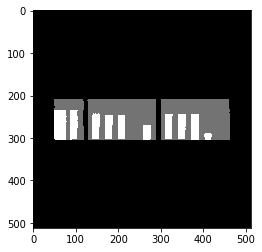

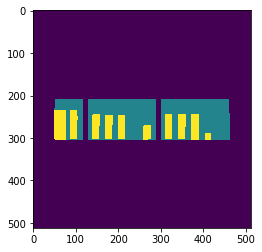

131


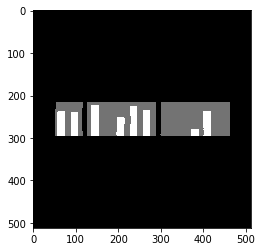

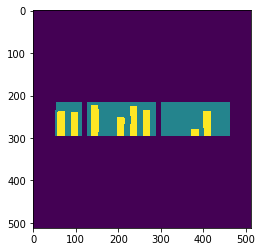

132


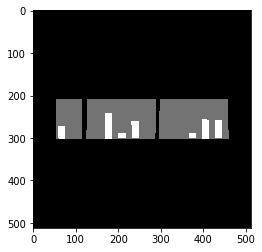

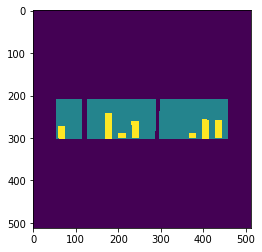

133


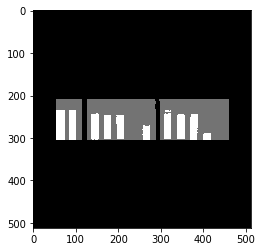

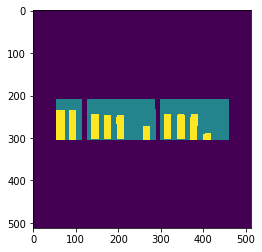

134


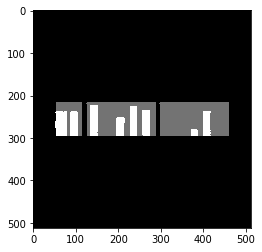

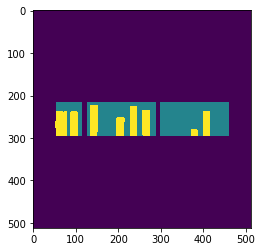

135


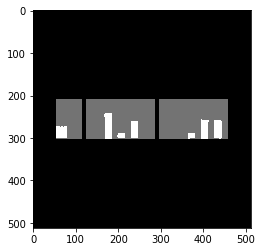

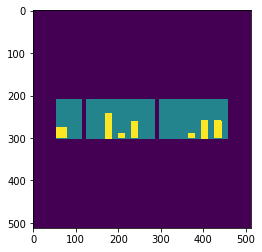

136


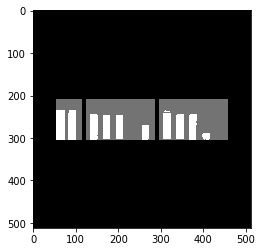

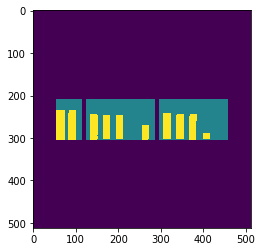

137


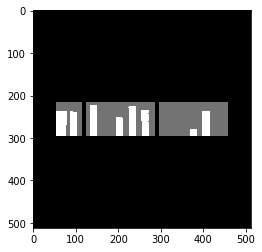

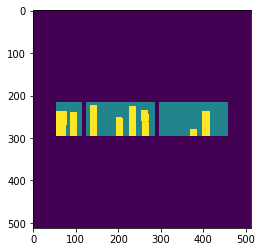

138


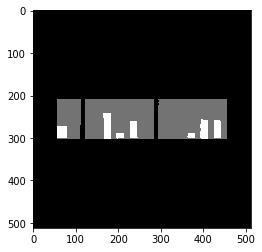

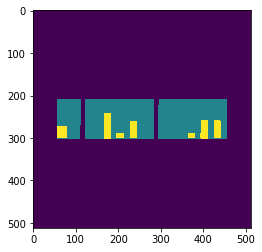

139


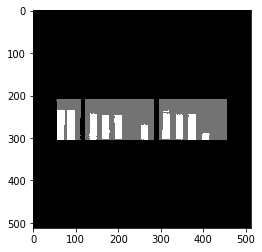

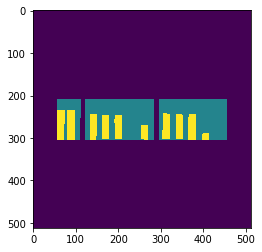

140


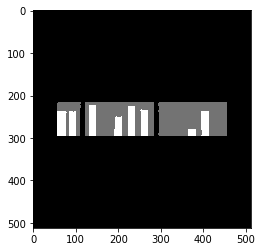

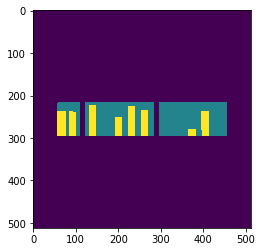

141


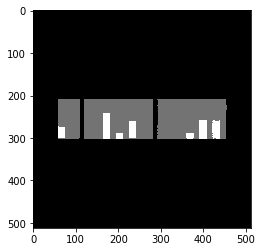

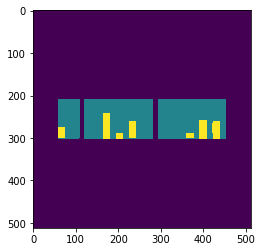

142


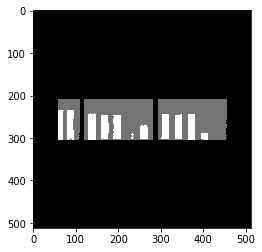

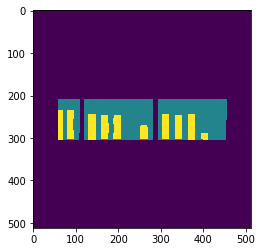

143


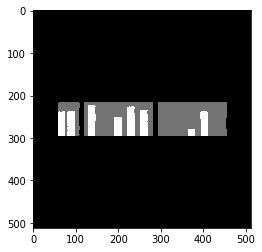

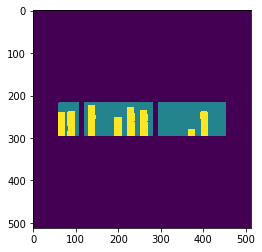

144


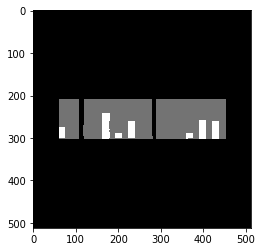

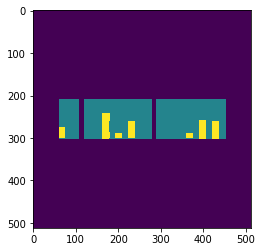

145


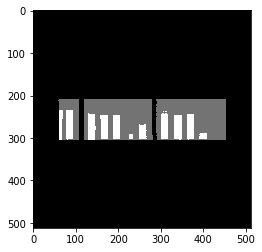

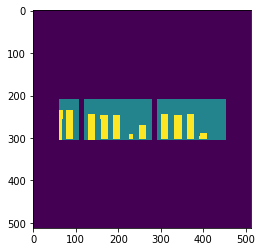

146


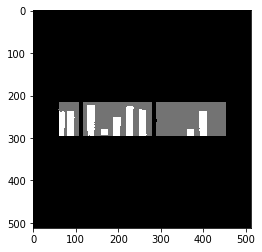

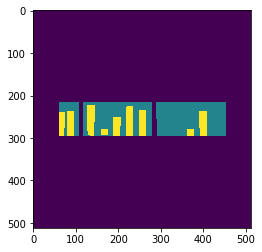

Layouts preprocessing done!!
CPU times: user 2min 13s, sys: 1.32 s, total: 2min 14s
Wall time: 1min 58s


In [7]:
%%time
result_dir = "/home/pranjali/Documents/Post_RackLay/vRacklay_spaced/Results_val_72/Results/"
front_layouts = "frontview_3d/"
top_layouts = "topview_3d/"
res_front = "proFrontview/"
res_top = "proTopview/"
processedLayout(result_dir + top_layouts, result_dir + res_top)
processedLayout(result_dir + front_layouts, result_dir + res_front)
print("Layouts preprocessing done!!")